In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import glob
import pickle
import helper_functions_06b as hf

In [2]:
DATE = ['20230303', '20230305']
SESSION = ['SM_Lek1', 'SE_Lek1']
DRONE = ['P1D1', 'P1D2', 'P2D3', 'P2D4', 'P3D5', 'P3D6']

tracking_directory = '/Volumes/EAS_shared/blackbuck/working/processed/Field_Recording_2023/SpatialRegistration'

In [3]:
# Thresholds for translation, rotation, and scale
thresholds = {
    'T_translation': 30,  # e.g., 30 pixels
    'T_rotation': 20,     # e.g., 20 degrees
    'T_scale': 0.1         # e.g., 10% change
}

In [4]:
for date in DATE:
    for session in SESSION:
        for drone in DRONE:
            print(date, session, drone)
            
            internal_path = tracking_directory + '/' + date + '/' + session + '/' + drone
            files = glob.glob(internal_path + '/' + date + '_' + session + '_' + drone + '*_tracked.csv')
            
            for file in sorted(files):
                df = pd.read_csv(file)
                
                df['x'] = df['bb_left'] + df['bb_width']/2
                df['y'] = df['bb_top'] + df['bb_height']/2
                df['idx'] = df['track_id']

                df = df.loc[:,['frame', 'x', 'y', 'idx']]
                
                # Step 1: Identify anchor frames
                anchor_frames = hf.identify_anchor_frames(df, thresholds)

                # Step 2: Find the best anchor for each frame
                df = hf.find_best_anchor_for_each_frame_parallel(df, anchor_frames)

                # Step 3: Apply homography using the best anchor for each frame
                df, homography_matrices, rms_errors = hf.apply_homography_to_best_anchor(df)

                df.to_csv(file[:-17] + '_Anchored.csv', index=False, mode='w')
                with open(file[:-17] + '_homographies.pkl', 'wb') as f:
                    pickle.dump(homography_matrices, f)

20230303 SM_Lek1 P1D1
Initial identification of anchors takes  15.408824920654297
Finding the best anchors took 215.9923849105835
Applying homography to the best anchors takes  147.76933193206787
Initial identification of anchors takes  14.509182214736938
Finding the best anchors took 216.2675850391388
Applying homography to the best anchors takes  146.39184737205505
Initial identification of anchors takes  12.6510488986969
Finding the best anchors took 37.56800365447998
Applying homography to the best anchors takes  150.70154404640198
Initial identification of anchors takes  18.70102310180664
Finding the best anchors took 128.69403076171875
Applying homography to the best anchors takes  150.20197200775146
Initial identification of anchors takes  12.841546058654785
Finding the best anchors took 44.47850489616394
Applying homography to the best anchors takes  152.98036313056946
Initial identification of anchors takes  1.9609227180480957
Finding the best anchors took 3.5390119552612305
A

Not enough matching points for homography between frame 3307 and frame 3812.
Not enough matching points for homography between frame 3307 and frame 3813.
Not enough matching points for homography between frame 3307 and frame 3814.
Not enough matching points for homography between frame 3307 and frame 3815.
Not enough matching points for homography between frame 3307 and frame 3816.
Not enough matching points for homography between frame 3307 and frame 3817.
Not enough matching points for homography between frame 3307 and frame 3818.
Not enough matching points for homography between frame 3307 and frame 3819.
Not enough matching points for homography between frame 3307 and frame 3820.
Not enough matching points for homography between frame 3307 and frame 3821.
Not enough matching points for homography between frame 3307 and frame 3822.
Not enough matching points for homography between frame 3307 and frame 3823.
Not enough matching points for homography between frame 3307 and frame 3824.

Not enough matching points for homography between frame 3307 and frame 4069.
Not enough matching points for homography between frame 3307 and frame 4070.
Not enough matching points for homography between frame 3307 and frame 4071.
Not enough matching points for homography between frame 3307 and frame 4072.
Not enough matching points for homography between frame 3307 and frame 4073.
Not enough matching points for homography between frame 3307 and frame 4074.
Not enough matching points for homography between frame 3307 and frame 4075.
Not enough matching points for homography between frame 3307 and frame 4076.
Not enough matching points for homography between frame 3307 and frame 4077.
Not enough matching points for homography between frame 3307 and frame 4078.
Not enough matching points for homography between frame 3307 and frame 4079.
Not enough matching points for homography between frame 3307 and frame 4080.
Not enough matching points for homography between frame 3307 and frame 4081.

Not enough matching points for homography between frame 3307 and frame 4310.
Not enough matching points for homography between frame 3307 and frame 4311.
Not enough matching points for homography between frame 3307 and frame 4312.
Not enough matching points for homography between frame 3307 and frame 4313.
Not enough matching points for homography between frame 3307 and frame 4314.
Not enough matching points for homography between frame 3307 and frame 4315.
Not enough matching points for homography between frame 3307 and frame 4316.
Not enough matching points for homography between frame 3307 and frame 4317.
Not enough matching points for homography between frame 3307 and frame 4318.
Not enough matching points for homography between frame 3307 and frame 4319.
Not enough matching points for homography between frame 3307 and frame 4320.
Not enough matching points for homography between frame 3307 and frame 4321.
Not enough matching points for homography between frame 3307 and frame 4322.

Finding the best anchors took 570.2293202877045
Not enough matching points for homography between frame nan and frame 3568.
Not enough matching points for homography between frame nan and frame 3580.
Not enough matching points for homography between frame nan and frame 3582.
Not enough matching points for homography between frame nan and frame 3583.
Not enough matching points for homography between frame nan and frame 3590.
Not enough matching points for homography between frame nan and frame 3591.
Not enough matching points for homography between frame nan and frame 3592.
Not enough matching points for homography between frame nan and frame 3593.
Not enough matching points for homography between frame nan and frame 3594.
Not enough matching points for homography between frame nan and frame 3595.
Not enough matching points for homography between frame nan and frame 3596.
Not enough matching points for homography between frame nan and frame 3597.
Not enough matching points for homograph

Not enough matching points for homography between frame nan and frame 3839.
Not enough matching points for homography between frame nan and frame 3840.
Not enough matching points for homography between frame nan and frame 3841.
Not enough matching points for homography between frame nan and frame 3842.
Not enough matching points for homography between frame nan and frame 3843.
Not enough matching points for homography between frame nan and frame 3844.
Not enough matching points for homography between frame nan and frame 3845.
Not enough matching points for homography between frame nan and frame 3846.
Not enough matching points for homography between frame nan and frame 3847.
Not enough matching points for homography between frame nan and frame 3848.
Not enough matching points for homography between frame nan and frame 3849.
Not enough matching points for homography between frame nan and frame 3850.
Not enough matching points for homography between frame nan and frame 3851.
Not enough m

Not enough matching points for homography between frame nan and frame 4188.
Not enough matching points for homography between frame nan and frame 4189.
Not enough matching points for homography between frame nan and frame 4190.
Not enough matching points for homography between frame nan and frame 4191.
Not enough matching points for homography between frame nan and frame 4192.
Not enough matching points for homography between frame nan and frame 4193.
Not enough matching points for homography between frame nan and frame 4194.
Not enough matching points for homography between frame nan and frame 4195.
Not enough matching points for homography between frame nan and frame 4196.
Not enough matching points for homography between frame nan and frame 4197.
Not enough matching points for homography between frame nan and frame 4198.
Not enough matching points for homography between frame nan and frame 4199.
Not enough matching points for homography between frame nan and frame 4200.
Not enough m

20230303 SM_Lek1 P1D2
Initial identification of anchors takes  16.663578033447266
Finding the best anchors took 754.354560136795
Applying homography to the best anchors takes  165.26062417030334
Initial identification of anchors takes  14.626630306243896
Finding the best anchors took 60.96076321601868
Applying homography to the best anchors takes  147.47188091278076
Initial identification of anchors takes  15.697293281555176
Finding the best anchors took 36.40304780006409
Applying homography to the best anchors takes  146.38530468940735
Initial identification of anchors takes  11.610747814178467
Finding the best anchors took 29.288108110427856
Applying homography to the best anchors takes  143.3449490070343
Initial identification of anchors takes  13.822438955307007
Finding the best anchors took 43.944714069366455
Applying homography to the best anchors takes  151.35858416557312
Initial identification of anchors takes  11.84588098526001
Finding the best anchors took 19.36660099029541
A

Initial identification of anchors takes  4.968089818954468
Finding the best anchors took 9.426660776138306
Applying homography to the best anchors takes  40.77129411697388
Initial identification of anchors takes  16.55011820793152
Finding the best anchors took 300.9494779109955
Applying homography to the best anchors takes  183.05870509147644
Initial identification of anchors takes  12.003427028656006
Finding the best anchors took 63.26641511917114
Applying homography to the best anchors takes  171.86974167823792
Initial identification of anchors takes  14.636317014694214
Finding the best anchors took 95.83558297157288
Applying homography to the best anchors takes  184.17123985290527
Initial identification of anchors takes  14.660959005355835
Finding the best anchors took 66.71725511550903
Applying homography to the best anchors takes  171.7977979183197
Initial identification of anchors takes  16.38213586807251
Finding the best anchors took 105.08406901359558
Applying homography to the

Not enough matching points for homography between frame 4527 and frame 4750.
Not enough matching points for homography between frame 4527 and frame 4751.
Not enough matching points for homography between frame 4527 and frame 4752.
Not enough matching points for homography between frame 4527 and frame 4753.
Not enough matching points for homography between frame 4527 and frame 4754.
Not enough matching points for homography between frame 4527 and frame 4755.
Not enough matching points for homography between frame 4527 and frame 4756.
Not enough matching points for homography between frame 4527 and frame 4757.
Not enough matching points for homography between frame 4527 and frame 4758.
Not enough matching points for homography between frame 4527 and frame 4759.
Not enough matching points for homography between frame 4527 and frame 4760.
Not enough matching points for homography between frame 4527 and frame 4761.
Not enough matching points for homography between frame 4527 and frame 4762.

Not enough matching points for homography between frame 4527 and frame 5080.
Not enough matching points for homography between frame 4527 and frame 5081.
Not enough matching points for homography between frame 4527 and frame 5082.
Not enough matching points for homography between frame 4527 and frame 5083.
Not enough matching points for homography between frame 4527 and frame 5084.
Not enough matching points for homography between frame 4527 and frame 5085.
Not enough matching points for homography between frame 4527 and frame 5086.
Not enough matching points for homography between frame 4527 and frame 5087.
Not enough matching points for homography between frame 4527 and frame 5088.
Not enough matching points for homography between frame 4527 and frame 5089.
Not enough matching points for homography between frame 4527 and frame 5090.
Not enough matching points for homography between frame 4527 and frame 5091.
Not enough matching points for homography between frame 4527 and frame 5092.

Not enough matching points for homography between frame 4527 and frame 5367.
Not enough matching points for homography between frame 4527 and frame 5368.
Not enough matching points for homography between frame 4527 and frame 5369.
Not enough matching points for homography between frame 4527 and frame 5370.
Not enough matching points for homography between frame 4527 and frame 5371.
Not enough matching points for homography between frame 4527 and frame 5372.
Not enough matching points for homography between frame 4527 and frame 5373.
Not enough matching points for homography between frame 4527 and frame 5374.
Not enough matching points for homography between frame 4527 and frame 5375.
Not enough matching points for homography between frame 4527 and frame 5376.
Not enough matching points for homography between frame 4527 and frame 5377.
Not enough matching points for homography between frame 4527 and frame 5378.
Not enough matching points for homography between frame 4527 and frame 5379.

Finding the best anchors took 180.305419921875
Not enough matching points for homography between frame nan and frame 4528.
Not enough matching points for homography between frame nan and frame 4529.
Not enough matching points for homography between frame nan and frame 4530.
Not enough matching points for homography between frame nan and frame 4531.
Not enough matching points for homography between frame nan and frame 4532.
Not enough matching points for homography between frame nan and frame 4533.
Not enough matching points for homography between frame nan and frame 4534.
Not enough matching points for homography between frame nan and frame 4535.
Not enough matching points for homography between frame nan and frame 4536.
Not enough matching points for homography between frame nan and frame 4537.
Not enough matching points for homography between frame nan and frame 4538.
Not enough matching points for homography between frame nan and frame 4539.
Not enough matching points for homography

Not enough matching points for homography between frame nan and frame 4738.
Not enough matching points for homography between frame nan and frame 4739.
Not enough matching points for homography between frame nan and frame 4740.
Not enough matching points for homography between frame nan and frame 4741.
Not enough matching points for homography between frame nan and frame 4742.
Not enough matching points for homography between frame nan and frame 4743.
Not enough matching points for homography between frame nan and frame 4744.
Not enough matching points for homography between frame nan and frame 4745.
Not enough matching points for homography between frame nan and frame 4746.
Not enough matching points for homography between frame nan and frame 4747.
Not enough matching points for homography between frame nan and frame 4748.
Not enough matching points for homography between frame nan and frame 4749.
Not enough matching points for homography between frame nan and frame 4750.
Not enough m

Not enough matching points for homography between frame nan and frame 4952.
Not enough matching points for homography between frame nan and frame 4953.
Not enough matching points for homography between frame nan and frame 4954.
Not enough matching points for homography between frame nan and frame 4955.
Not enough matching points for homography between frame nan and frame 4956.
Not enough matching points for homography between frame nan and frame 4957.
Not enough matching points for homography between frame nan and frame 4958.
Not enough matching points for homography between frame nan and frame 4959.
Not enough matching points for homography between frame nan and frame 4960.
Not enough matching points for homography between frame nan and frame 4961.
Not enough matching points for homography between frame nan and frame 4962.
Not enough matching points for homography between frame nan and frame 4963.
Not enough matching points for homography between frame nan and frame 4964.
Not enough m

Not enough matching points for homography between frame nan and frame 5164.
Not enough matching points for homography between frame nan and frame 5165.
Not enough matching points for homography between frame nan and frame 5166.
Not enough matching points for homography between frame nan and frame 5167.
Not enough matching points for homography between frame nan and frame 5168.
Not enough matching points for homography between frame nan and frame 5169.
Not enough matching points for homography between frame nan and frame 5170.
Not enough matching points for homography between frame nan and frame 5171.
Not enough matching points for homography between frame nan and frame 5172.
Not enough matching points for homography between frame nan and frame 5173.
Not enough matching points for homography between frame nan and frame 5174.
Not enough matching points for homography between frame nan and frame 5175.
Not enough matching points for homography between frame nan and frame 5176.
Not enough m

Not enough matching points for homography between frame nan and frame 5375.
Not enough matching points for homography between frame nan and frame 5376.
Not enough matching points for homography between frame nan and frame 5377.
Not enough matching points for homography between frame nan and frame 5378.
Not enough matching points for homography between frame nan and frame 5379.
Not enough matching points for homography between frame nan and frame 5380.
Not enough matching points for homography between frame nan and frame 5381.
Not enough matching points for homography between frame nan and frame 5382.
Not enough matching points for homography between frame nan and frame 5383.
Not enough matching points for homography between frame nan and frame 5384.
Not enough matching points for homography between frame nan and frame 5385.
Not enough matching points for homography between frame nan and frame 5386.
Not enough matching points for homography between frame nan and frame 5387.
Not enough m

Not enough matching points for homography between frame nan and frame 5587.
Not enough matching points for homography between frame nan and frame 5588.
Not enough matching points for homography between frame nan and frame 5589.
Not enough matching points for homography between frame nan and frame 5590.
Not enough matching points for homography between frame nan and frame 5591.
Not enough matching points for homography between frame nan and frame 5592.
Not enough matching points for homography between frame nan and frame 5593.
Not enough matching points for homography between frame nan and frame 5594.
Not enough matching points for homography between frame nan and frame 5595.
Not enough matching points for homography between frame nan and frame 5596.
Not enough matching points for homography between frame nan and frame 5597.
Not enough matching points for homography between frame nan and frame 5598.
Not enough matching points for homography between frame nan and frame 5599.
Not enough m

Not enough matching points for homography between frame nan and frame 5797.
Not enough matching points for homography between frame nan and frame 5798.
Not enough matching points for homography between frame nan and frame 5799.
Not enough matching points for homography between frame nan and frame 5800.
Not enough matching points for homography between frame nan and frame 5801.
Not enough matching points for homography between frame nan and frame 5802.
Applying homography to the best anchors takes  114.7798421382904
Not enough matching points for homography between frame 396 and frame 397.
Not enough matching points for homography between frame 396 and frame 398.
Not enough matching points for homography between frame 396 and frame 399.
Not enough matching points for homography between frame 396 and frame 400.
Not enough matching points for homography between frame 396 and frame 401.
Not enough matching points for homography between frame 396 and frame 402.
Not enough matching points fo

Not enough matching points for homography between frame 887 and frame 1121.
Not enough matching points for homography between frame 887 and frame 1122.
Not enough matching points for homography between frame 887 and frame 1123.
Not enough matching points for homography between frame 887 and frame 1124.
Not enough matching points for homography between frame 887 and frame 1125.
Not enough matching points for homography between frame 887 and frame 1126.
Not enough matching points for homography between frame 887 and frame 1127.
Not enough matching points for homography between frame 887 and frame 1128.
Not enough matching points for homography between frame 887 and frame 1129.
Not enough matching points for homography between frame 887 and frame 1130.
Not enough matching points for homography between frame 887 and frame 1131.
Not enough matching points for homography between frame 887 and frame 1132.
Not enough matching points for homography between frame 887 and frame 1133.
Not enough m

Not enough matching points for homography between frame 887 and frame 1388.
Not enough matching points for homography between frame 887 and frame 1389.
Not enough matching points for homography between frame 887 and frame 1390.
Not enough matching points for homography between frame 887 and frame 1391.
Not enough matching points for homography between frame 887 and frame 1392.
Not enough matching points for homography between frame 887 and frame 1393.
Not enough matching points for homography between frame 887 and frame 1394.
Not enough matching points for homography between frame 887 and frame 1395.
Not enough matching points for homography between frame 887 and frame 1396.
Not enough matching points for homography between frame 887 and frame 1397.
Not enough matching points for homography between frame 887 and frame 1398.
Not enough matching points for homography between frame 887 and frame 1399.
Not enough matching points for homography between frame 887 and frame 1400.
Not enough m

Not enough matching points for homography between frame 887 and frame 1609.
Not enough matching points for homography between frame 887 and frame 1610.
Not enough matching points for homography between frame 887 and frame 1611.
Not enough matching points for homography between frame 887 and frame 1612.
Not enough matching points for homography between frame 887 and frame 1613.
Not enough matching points for homography between frame 887 and frame 1614.
Not enough matching points for homography between frame 887 and frame 1615.
Not enough matching points for homography between frame 887 and frame 1616.
Not enough matching points for homography between frame 887 and frame 1617.
Not enough matching points for homography between frame 887 and frame 1618.
Not enough matching points for homography between frame 887 and frame 1619.
Not enough matching points for homography between frame 887 and frame 1620.
Not enough matching points for homography between frame 887 and frame 1621.
Not enough m

Not enough matching points for homography between frame 887 and frame 1851.
Not enough matching points for homography between frame 887 and frame 1852.
Not enough matching points for homography between frame 887 and frame 1853.
Not enough matching points for homography between frame 887 and frame 1854.
Not enough matching points for homography between frame 887 and frame 1855.
Not enough matching points for homography between frame 887 and frame 1856.
Not enough matching points for homography between frame 887 and frame 1857.
Not enough matching points for homography between frame 887 and frame 1858.
Not enough matching points for homography between frame 887 and frame 1859.
Not enough matching points for homography between frame 887 and frame 1860.
Not enough matching points for homography between frame 887 and frame 1861.
Not enough matching points for homography between frame 887 and frame 1862.
Not enough matching points for homography between frame 887 and frame 1863.
Not enough m

Not enough matching points for homography between frame 887 and frame 2193.
Not enough matching points for homography between frame 887 and frame 2194.
Not enough matching points for homography between frame 887 and frame 2195.
Not enough matching points for homography between frame 887 and frame 2196.
Not enough matching points for homography between frame 887 and frame 2197.
Not enough matching points for homography between frame 887 and frame 2198.
Not enough matching points for homography between frame 887 and frame 2199.
Not enough matching points for homography between frame 887 and frame 2200.
Not enough matching points for homography between frame 887 and frame 2201.
Not enough matching points for homography between frame 887 and frame 2202.
Not enough matching points for homography between frame 887 and frame 2203.
Not enough matching points for homography between frame 887 and frame 2204.
Not enough matching points for homography between frame 887 and frame 2205.
Not enough m

Not enough matching points for homography between frame 887 and frame 2432.
Not enough matching points for homography between frame 887 and frame 2433.
Not enough matching points for homography between frame 887 and frame 2434.
Not enough matching points for homography between frame 887 and frame 2435.
Not enough matching points for homography between frame 887 and frame 2436.
Not enough matching points for homography between frame 887 and frame 2437.
Not enough matching points for homography between frame 887 and frame 2438.
Not enough matching points for homography between frame 887 and frame 2439.
Not enough matching points for homography between frame 887 and frame 2440.
Not enough matching points for homography between frame 887 and frame 2441.
Not enough matching points for homography between frame 887 and frame 2442.
Not enough matching points for homography between frame 887 and frame 2443.
Not enough matching points for homography between frame 887 and frame 2444.
Not enough m

Not enough matching points for homography between frame 887 and frame 2719.
Not enough matching points for homography between frame 887 and frame 2720.
Not enough matching points for homography between frame 887 and frame 2721.
Not enough matching points for homography between frame 887 and frame 2722.
Not enough matching points for homography between frame 887 and frame 2723.
Not enough matching points for homography between frame 887 and frame 2724.
Not enough matching points for homography between frame 887 and frame 2725.
Not enough matching points for homography between frame 887 and frame 2726.
Not enough matching points for homography between frame 887 and frame 2727.
Not enough matching points for homography between frame 887 and frame 2728.
Not enough matching points for homography between frame 887 and frame 2729.
Not enough matching points for homography between frame 887 and frame 2730.
Not enough matching points for homography between frame 887 and frame 2731.
Not enough m

Not enough matching points for homography between frame 887 and frame 3049.
Not enough matching points for homography between frame 887 and frame 3050.
Not enough matching points for homography between frame 887 and frame 3051.
Not enough matching points for homography between frame 887 and frame 3052.
Not enough matching points for homography between frame 887 and frame 3053.
Not enough matching points for homography between frame 887 and frame 3054.
Not enough matching points for homography between frame 887 and frame 3055.
Not enough matching points for homography between frame 887 and frame 3056.
Not enough matching points for homography between frame 887 and frame 3057.
Not enough matching points for homography between frame 887 and frame 3058.
Not enough matching points for homography between frame 887 and frame 3059.
Not enough matching points for homography between frame 887 and frame 3060.
Not enough matching points for homography between frame 887 and frame 3061.
Not enough m

Not enough matching points for homography between frame 887 and frame 3341.
Not enough matching points for homography between frame 887 and frame 3342.
Not enough matching points for homography between frame 887 and frame 3343.
Not enough matching points for homography between frame 887 and frame 3344.
Not enough matching points for homography between frame 887 and frame 3345.
Not enough matching points for homography between frame 887 and frame 3346.
Not enough matching points for homography between frame 887 and frame 3347.
Not enough matching points for homography between frame 887 and frame 3348.
Not enough matching points for homography between frame 887 and frame 3349.
Not enough matching points for homography between frame 887 and frame 3350.
Not enough matching points for homography between frame 887 and frame 3351.
Not enough matching points for homography between frame 887 and frame 3352.
Not enough matching points for homography between frame 887 and frame 3353.
Not enough m

Not enough matching points for homography between frame 887 and frame 3571.
Not enough matching points for homography between frame 887 and frame 3572.
Not enough matching points for homography between frame 887 and frame 3573.
Not enough matching points for homography between frame 887 and frame 3574.
Not enough matching points for homography between frame 887 and frame 3575.
Not enough matching points for homography between frame 887 and frame 3576.
Not enough matching points for homography between frame 887 and frame 3577.
Not enough matching points for homography between frame 887 and frame 3578.
Not enough matching points for homography between frame 887 and frame 3579.
Not enough matching points for homography between frame 887 and frame 3580.
Not enough matching points for homography between frame 887 and frame 3581.
Not enough matching points for homography between frame 887 and frame 3582.
Not enough matching points for homography between frame 887 and frame 3583.
Not enough m

Not enough matching points for homography between frame 887 and frame 3846.
Not enough matching points for homography between frame 887 and frame 3847.
Not enough matching points for homography between frame 887 and frame 3848.
Not enough matching points for homography between frame 887 and frame 3849.
Not enough matching points for homography between frame 887 and frame 3850.
Not enough matching points for homography between frame 887 and frame 3851.
Not enough matching points for homography between frame 887 and frame 3852.
Not enough matching points for homography between frame 887 and frame 3853.
Not enough matching points for homography between frame 887 and frame 3854.
Not enough matching points for homography between frame 887 and frame 3855.
Not enough matching points for homography between frame 887 and frame 3856.
Not enough matching points for homography between frame 887 and frame 3857.
Not enough matching points for homography between frame 887 and frame 3858.
Not enough m

Not enough matching points for homography between frame 887 and frame 4078.
Not enough matching points for homography between frame 887 and frame 4079.
Not enough matching points for homography between frame 887 and frame 4080.
Not enough matching points for homography between frame 887 and frame 4081.
Not enough matching points for homography between frame 887 and frame 4082.
Not enough matching points for homography between frame 887 and frame 4083.
Not enough matching points for homography between frame 887 and frame 4084.
Not enough matching points for homography between frame 887 and frame 4085.
Not enough matching points for homography between frame 887 and frame 4086.
Not enough matching points for homography between frame 887 and frame 4087.
Not enough matching points for homography between frame 887 and frame 4088.
Not enough matching points for homography between frame 887 and frame 4089.
Not enough matching points for homography between frame 887 and frame 4090.
Not enough m

Not enough matching points for homography between frame 887 and frame 4304.
Not enough matching points for homography between frame 887 and frame 4305.
Not enough matching points for homography between frame 887 and frame 4306.
Not enough matching points for homography between frame 887 and frame 4307.
Not enough matching points for homography between frame 887 and frame 4308.
Not enough matching points for homography between frame 887 and frame 4309.
Not enough matching points for homography between frame 887 and frame 4310.
Not enough matching points for homography between frame 887 and frame 4311.
Not enough matching points for homography between frame 887 and frame 4312.
Not enough matching points for homography between frame 887 and frame 4313.
Not enough matching points for homography between frame 887 and frame 4314.
Not enough matching points for homography between frame 887 and frame 4315.
Not enough matching points for homography between frame 887 and frame 4316.
Not enough m

Not enough matching points for homography between frame 887 and frame 4560.
Not enough matching points for homography between frame 887 and frame 4561.
Not enough matching points for homography between frame 887 and frame 4562.
Not enough matching points for homography between frame 887 and frame 4563.
Not enough matching points for homography between frame 887 and frame 4564.
Not enough matching points for homography between frame 887 and frame 4565.
Not enough matching points for homography between frame 887 and frame 4566.
Not enough matching points for homography between frame 887 and frame 4567.
Not enough matching points for homography between frame 887 and frame 4568.
Not enough matching points for homography between frame 887 and frame 4569.
Not enough matching points for homography between frame 887 and frame 4570.
Not enough matching points for homography between frame 887 and frame 4571.
Not enough matching points for homography between frame 887 and frame 4572.
Not enough m

Not enough matching points for homography between frame 887 and frame 4785.
Not enough matching points for homography between frame 887 and frame 4786.
Not enough matching points for homography between frame 887 and frame 4787.
Not enough matching points for homography between frame 887 and frame 4788.
Not enough matching points for homography between frame 887 and frame 4789.
Not enough matching points for homography between frame 887 and frame 4790.
Not enough matching points for homography between frame 887 and frame 4791.
Not enough matching points for homography between frame 887 and frame 4792.
Not enough matching points for homography between frame 887 and frame 4793.
Not enough matching points for homography between frame 887 and frame 4794.
Not enough matching points for homography between frame 887 and frame 4795.
Not enough matching points for homography between frame 887 and frame 4796.
Not enough matching points for homography between frame 887 and frame 4797.
Not enough m

Not enough matching points for homography between frame 887 and frame 5070.
Not enough matching points for homography between frame 887 and frame 5071.
Not enough matching points for homography between frame 887 and frame 5072.
Not enough matching points for homography between frame 887 and frame 5073.
Not enough matching points for homography between frame 887 and frame 5074.
Not enough matching points for homography between frame 887 and frame 5075.
Not enough matching points for homography between frame 887 and frame 5076.
Not enough matching points for homography between frame 887 and frame 5077.
Not enough matching points for homography between frame 887 and frame 5078.
Not enough matching points for homography between frame 887 and frame 5079.
Not enough matching points for homography between frame 887 and frame 5080.
Not enough matching points for homography between frame 887 and frame 5081.
Not enough matching points for homography between frame 887 and frame 5082.
Not enough m

Not enough matching points for homography between frame 887 and frame 5393.
Not enough matching points for homography between frame 887 and frame 5394.
Not enough matching points for homography between frame 887 and frame 5395.
Not enough matching points for homography between frame 887 and frame 5396.
Not enough matching points for homography between frame 887 and frame 5397.
Not enough matching points for homography between frame 887 and frame 5398.
Not enough matching points for homography between frame 887 and frame 5399.
Not enough matching points for homography between frame 887 and frame 5400.
Not enough matching points for homography between frame 887 and frame 5401.
Not enough matching points for homography between frame 887 and frame 5402.
Not enough matching points for homography between frame 887 and frame 5403.
Not enough matching points for homography between frame 887 and frame 5404.
Not enough matching points for homography between frame 887 and frame 5405.
Not enough m

Not enough matching points for homography between frame 887 and frame 5626.
Not enough matching points for homography between frame 887 and frame 5627.
Not enough matching points for homography between frame 887 and frame 5628.
Not enough matching points for homography between frame 887 and frame 5629.
Not enough matching points for homography between frame 887 and frame 5630.
Not enough matching points for homography between frame 887 and frame 5631.
Not enough matching points for homography between frame 887 and frame 5632.
Not enough matching points for homography between frame 887 and frame 5633.
Not enough matching points for homography between frame 887 and frame 5634.
Not enough matching points for homography between frame 887 and frame 5635.
Not enough matching points for homography between frame 887 and frame 5636.
Not enough matching points for homography between frame 887 and frame 5637.
Not enough matching points for homography between frame 887 and frame 5638.
Not enough m

Finding the best anchors took 58.45204186439514
Not enough matching points for homography between frame nan and frame 888.
Not enough matching points for homography between frame nan and frame 889.
Not enough matching points for homography between frame nan and frame 890.
Not enough matching points for homography between frame nan and frame 891.
Not enough matching points for homography between frame nan and frame 892.
Not enough matching points for homography between frame nan and frame 893.
Not enough matching points for homography between frame nan and frame 894.
Not enough matching points for homography between frame nan and frame 895.
Not enough matching points for homography between frame nan and frame 896.
Not enough matching points for homography between frame nan and frame 897.
Not enough matching points for homography between frame nan and frame 898.
Not enough matching points for homography between frame nan and frame 899.
Not enough matching points for homography between fr

Not enough matching points for homography between frame nan and frame 1101.
Not enough matching points for homography between frame nan and frame 1102.
Not enough matching points for homography between frame nan and frame 1103.
Not enough matching points for homography between frame nan and frame 1104.
Not enough matching points for homography between frame nan and frame 1105.
Not enough matching points for homography between frame nan and frame 1106.
Not enough matching points for homography between frame nan and frame 1107.
Not enough matching points for homography between frame nan and frame 1108.
Not enough matching points for homography between frame nan and frame 1109.
Not enough matching points for homography between frame nan and frame 1110.
Not enough matching points for homography between frame nan and frame 1111.
Not enough matching points for homography between frame nan and frame 1112.
Not enough matching points for homography between frame nan and frame 1113.
Not enough m

Not enough matching points for homography between frame nan and frame 1312.
Not enough matching points for homography between frame nan and frame 1313.
Not enough matching points for homography between frame nan and frame 1314.
Not enough matching points for homography between frame nan and frame 1315.
Not enough matching points for homography between frame nan and frame 1316.
Not enough matching points for homography between frame nan and frame 1317.
Not enough matching points for homography between frame nan and frame 1318.
Not enough matching points for homography between frame nan and frame 1319.
Not enough matching points for homography between frame nan and frame 1320.
Not enough matching points for homography between frame nan and frame 1321.
Not enough matching points for homography between frame nan and frame 1322.
Not enough matching points for homography between frame nan and frame 1323.
Not enough matching points for homography between frame nan and frame 1324.
Not enough m

Not enough matching points for homography between frame nan and frame 1523.
Not enough matching points for homography between frame nan and frame 1524.
Not enough matching points for homography between frame nan and frame 1525.
Not enough matching points for homography between frame nan and frame 1526.
Not enough matching points for homography between frame nan and frame 1527.
Not enough matching points for homography between frame nan and frame 1528.
Not enough matching points for homography between frame nan and frame 1529.
Not enough matching points for homography between frame nan and frame 1530.
Not enough matching points for homography between frame nan and frame 1531.
Not enough matching points for homography between frame nan and frame 1532.
Not enough matching points for homography between frame nan and frame 1533.
Not enough matching points for homography between frame nan and frame 1534.
Not enough matching points for homography between frame nan and frame 1535.
Not enough m

Not enough matching points for homography between frame nan and frame 1735.
Not enough matching points for homography between frame nan and frame 1736.
Not enough matching points for homography between frame nan and frame 1737.
Not enough matching points for homography between frame nan and frame 1738.
Not enough matching points for homography between frame nan and frame 1739.
Not enough matching points for homography between frame nan and frame 1740.
Not enough matching points for homography between frame nan and frame 1741.
Not enough matching points for homography between frame nan and frame 1742.
Not enough matching points for homography between frame nan and frame 1743.
Not enough matching points for homography between frame nan and frame 1744.
Not enough matching points for homography between frame nan and frame 1745.
Not enough matching points for homography between frame nan and frame 1746.
Not enough matching points for homography between frame nan and frame 1747.
Not enough m

Not enough matching points for homography between frame nan and frame 1947.
Not enough matching points for homography between frame nan and frame 1948.
Not enough matching points for homography between frame nan and frame 1949.
Not enough matching points for homography between frame nan and frame 1950.
Not enough matching points for homography between frame nan and frame 1951.
Not enough matching points for homography between frame nan and frame 1952.
Not enough matching points for homography between frame nan and frame 1953.
Not enough matching points for homography between frame nan and frame 1954.
Not enough matching points for homography between frame nan and frame 1955.
Not enough matching points for homography between frame nan and frame 1956.
Not enough matching points for homography between frame nan and frame 1957.
Not enough matching points for homography between frame nan and frame 1958.
Not enough matching points for homography between frame nan and frame 1959.
Not enough m

Not enough matching points for homography between frame nan and frame 2160.
Not enough matching points for homography between frame nan and frame 2161.
Not enough matching points for homography between frame nan and frame 2162.
Not enough matching points for homography between frame nan and frame 2163.
Not enough matching points for homography between frame nan and frame 2164.
Not enough matching points for homography between frame nan and frame 2165.
Not enough matching points for homography between frame nan and frame 2166.
Not enough matching points for homography between frame nan and frame 2167.
Not enough matching points for homography between frame nan and frame 2168.
Not enough matching points for homography between frame nan and frame 2169.
Not enough matching points for homography between frame nan and frame 2170.
Not enough matching points for homography between frame nan and frame 2171.
Not enough matching points for homography between frame nan and frame 2172.
Not enough m

Not enough matching points for homography between frame nan and frame 2373.
Not enough matching points for homography between frame nan and frame 2374.
Not enough matching points for homography between frame nan and frame 2375.
Not enough matching points for homography between frame nan and frame 2376.
Not enough matching points for homography between frame nan and frame 2377.
Not enough matching points for homography between frame nan and frame 2378.
Not enough matching points for homography between frame nan and frame 2379.
Not enough matching points for homography between frame nan and frame 2380.
Not enough matching points for homography between frame nan and frame 2381.
Not enough matching points for homography between frame nan and frame 2382.
Not enough matching points for homography between frame nan and frame 2383.
Not enough matching points for homography between frame nan and frame 2384.
Not enough matching points for homography between frame nan and frame 2385.
Not enough m

Not enough matching points for homography between frame nan and frame 2586.
Not enough matching points for homography between frame nan and frame 2587.
Not enough matching points for homography between frame nan and frame 2588.
Not enough matching points for homography between frame nan and frame 2589.
Not enough matching points for homography between frame nan and frame 2590.
Not enough matching points for homography between frame nan and frame 2591.
Not enough matching points for homography between frame nan and frame 2592.
Not enough matching points for homography between frame nan and frame 2593.
Not enough matching points for homography between frame nan and frame 2594.
Not enough matching points for homography between frame nan and frame 2595.
Not enough matching points for homography between frame nan and frame 2596.
Not enough matching points for homography between frame nan and frame 2597.
Not enough matching points for homography between frame nan and frame 2598.
Not enough m

Not enough matching points for homography between frame nan and frame 2792.
Not enough matching points for homography between frame nan and frame 2793.
Not enough matching points for homography between frame nan and frame 2794.
Not enough matching points for homography between frame nan and frame 2795.
Not enough matching points for homography between frame nan and frame 2796.
Not enough matching points for homography between frame nan and frame 2797.
Not enough matching points for homography between frame nan and frame 2798.
Not enough matching points for homography between frame nan and frame 2799.
Not enough matching points for homography between frame nan and frame 2800.
Not enough matching points for homography between frame nan and frame 2801.
Not enough matching points for homography between frame nan and frame 2802.
Not enough matching points for homography between frame nan and frame 2803.
Not enough matching points for homography between frame nan and frame 2804.
Not enough m

Not enough matching points for homography between frame nan and frame 3000.
Not enough matching points for homography between frame nan and frame 3001.
Not enough matching points for homography between frame nan and frame 3002.
Not enough matching points for homography between frame nan and frame 3003.
Not enough matching points for homography between frame nan and frame 3004.
Not enough matching points for homography between frame nan and frame 3005.
Not enough matching points for homography between frame nan and frame 3006.
Not enough matching points for homography between frame nan and frame 3007.
Not enough matching points for homography between frame nan and frame 3008.
Not enough matching points for homography between frame nan and frame 3009.
Not enough matching points for homography between frame nan and frame 3010.
Not enough matching points for homography between frame nan and frame 3011.
Not enough matching points for homography between frame nan and frame 3012.
Not enough m

Not enough matching points for homography between frame nan and frame 3211.
Not enough matching points for homography between frame nan and frame 3212.
Not enough matching points for homography between frame nan and frame 3213.
Not enough matching points for homography between frame nan and frame 3214.
Not enough matching points for homography between frame nan and frame 3215.
Not enough matching points for homography between frame nan and frame 3216.
Not enough matching points for homography between frame nan and frame 3217.
Not enough matching points for homography between frame nan and frame 3218.
Not enough matching points for homography between frame nan and frame 3219.
Not enough matching points for homography between frame nan and frame 3220.
Not enough matching points for homography between frame nan and frame 3221.
Not enough matching points for homography between frame nan and frame 3222.
Not enough matching points for homography between frame nan and frame 3223.
Not enough m

Not enough matching points for homography between frame nan and frame 3423.
Not enough matching points for homography between frame nan and frame 3424.
Not enough matching points for homography between frame nan and frame 3425.
Not enough matching points for homography between frame nan and frame 3426.
Not enough matching points for homography between frame nan and frame 3427.
Not enough matching points for homography between frame nan and frame 3428.
Not enough matching points for homography between frame nan and frame 3429.
Not enough matching points for homography between frame nan and frame 3430.
Not enough matching points for homography between frame nan and frame 3431.
Not enough matching points for homography between frame nan and frame 3432.
Not enough matching points for homography between frame nan and frame 3433.
Not enough matching points for homography between frame nan and frame 3434.
Not enough matching points for homography between frame nan and frame 3435.
Not enough m

Not enough matching points for homography between frame nan and frame 3635.
Not enough matching points for homography between frame nan and frame 3636.
Not enough matching points for homography between frame nan and frame 3637.
Not enough matching points for homography between frame nan and frame 3638.
Not enough matching points for homography between frame nan and frame 3639.
Not enough matching points for homography between frame nan and frame 3640.
Not enough matching points for homography between frame nan and frame 3641.
Not enough matching points for homography between frame nan and frame 3642.
Not enough matching points for homography between frame nan and frame 3643.
Not enough matching points for homography between frame nan and frame 3644.
Not enough matching points for homography between frame nan and frame 3645.
Not enough matching points for homography between frame nan and frame 3646.
Not enough matching points for homography between frame nan and frame 3647.
Not enough m

Not enough matching points for homography between frame nan and frame 3846.
Not enough matching points for homography between frame nan and frame 3847.
Not enough matching points for homography between frame nan and frame 3848.
Not enough matching points for homography between frame nan and frame 3849.
Not enough matching points for homography between frame nan and frame 3850.
Not enough matching points for homography between frame nan and frame 3851.
Not enough matching points for homography between frame nan and frame 3852.
Not enough matching points for homography between frame nan and frame 3853.
Not enough matching points for homography between frame nan and frame 3854.
Not enough matching points for homography between frame nan and frame 3855.
Not enough matching points for homography between frame nan and frame 3856.
Not enough matching points for homography between frame nan and frame 3857.
Not enough matching points for homography between frame nan and frame 3858.
Not enough m

Not enough matching points for homography between frame nan and frame 4059.
Not enough matching points for homography between frame nan and frame 4060.
Not enough matching points for homography between frame nan and frame 4061.
Not enough matching points for homography between frame nan and frame 4062.
Not enough matching points for homography between frame nan and frame 4063.
Not enough matching points for homography between frame nan and frame 4064.
Not enough matching points for homography between frame nan and frame 4065.
Not enough matching points for homography between frame nan and frame 4066.
Not enough matching points for homography between frame nan and frame 4067.
Not enough matching points for homography between frame nan and frame 4068.
Not enough matching points for homography between frame nan and frame 4069.
Not enough matching points for homography between frame nan and frame 4070.
Not enough matching points for homography between frame nan and frame 4071.
Not enough m

Not enough matching points for homography between frame nan and frame 4269.
Not enough matching points for homography between frame nan and frame 4270.
Not enough matching points for homography between frame nan and frame 4271.
Not enough matching points for homography between frame nan and frame 4272.
Not enough matching points for homography between frame nan and frame 4273.
Not enough matching points for homography between frame nan and frame 4274.
Not enough matching points for homography between frame nan and frame 4275.
Not enough matching points for homography between frame nan and frame 4276.
Not enough matching points for homography between frame nan and frame 4277.
Not enough matching points for homography between frame nan and frame 4278.
Not enough matching points for homography between frame nan and frame 4279.
Not enough matching points for homography between frame nan and frame 4280.
Not enough matching points for homography between frame nan and frame 4281.
Not enough m

Not enough matching points for homography between frame nan and frame 4480.
Not enough matching points for homography between frame nan and frame 4481.
Not enough matching points for homography between frame nan and frame 4482.
Not enough matching points for homography between frame nan and frame 4483.
Not enough matching points for homography between frame nan and frame 4484.
Not enough matching points for homography between frame nan and frame 4485.
Not enough matching points for homography between frame nan and frame 4486.
Not enough matching points for homography between frame nan and frame 4487.
Not enough matching points for homography between frame nan and frame 4488.
Not enough matching points for homography between frame nan and frame 4489.
Not enough matching points for homography between frame nan and frame 4490.
Not enough matching points for homography between frame nan and frame 4491.
Not enough matching points for homography between frame nan and frame 4492.
Not enough m

Not enough matching points for homography between frame nan and frame 4690.
Not enough matching points for homography between frame nan and frame 4691.
Not enough matching points for homography between frame nan and frame 4692.
Not enough matching points for homography between frame nan and frame 4693.
Not enough matching points for homography between frame nan and frame 4694.
Not enough matching points for homography between frame nan and frame 4695.
Not enough matching points for homography between frame nan and frame 4696.
Not enough matching points for homography between frame nan and frame 4697.
Not enough matching points for homography between frame nan and frame 4698.
Not enough matching points for homography between frame nan and frame 4699.
Not enough matching points for homography between frame nan and frame 4700.
Not enough matching points for homography between frame nan and frame 4701.
Not enough matching points for homography between frame nan and frame 4702.
Not enough m

Not enough matching points for homography between frame nan and frame 4902.
Not enough matching points for homography between frame nan and frame 4903.
Not enough matching points for homography between frame nan and frame 4904.
Not enough matching points for homography between frame nan and frame 4905.
Not enough matching points for homography between frame nan and frame 4906.
Not enough matching points for homography between frame nan and frame 4907.
Not enough matching points for homography between frame nan and frame 4908.
Not enough matching points for homography between frame nan and frame 4909.
Not enough matching points for homography between frame nan and frame 4910.
Not enough matching points for homography between frame nan and frame 4911.
Not enough matching points for homography between frame nan and frame 4912.
Not enough matching points for homography between frame nan and frame 4913.
Not enough matching points for homography between frame nan and frame 4914.
Not enough m

Not enough matching points for homography between frame nan and frame 5113.
Not enough matching points for homography between frame nan and frame 5114.
Not enough matching points for homography between frame nan and frame 5115.
Not enough matching points for homography between frame nan and frame 5116.
Not enough matching points for homography between frame nan and frame 5117.
Not enough matching points for homography between frame nan and frame 5118.
Not enough matching points for homography between frame nan and frame 5119.
Not enough matching points for homography between frame nan and frame 5120.
Not enough matching points for homography between frame nan and frame 5121.
Not enough matching points for homography between frame nan and frame 5122.
Not enough matching points for homography between frame nan and frame 5123.
Not enough matching points for homography between frame nan and frame 5124.
Not enough matching points for homography between frame nan and frame 5125.
Not enough m

Not enough matching points for homography between frame nan and frame 5336.
Not enough matching points for homography between frame nan and frame 5337.
Not enough matching points for homography between frame nan and frame 5338.
Not enough matching points for homography between frame nan and frame 5339.
Not enough matching points for homography between frame nan and frame 5340.
Not enough matching points for homography between frame nan and frame 5341.
Not enough matching points for homography between frame nan and frame 5342.
Not enough matching points for homography between frame nan and frame 5343.
Not enough matching points for homography between frame nan and frame 5344.
Not enough matching points for homography between frame nan and frame 5345.
Not enough matching points for homography between frame nan and frame 5346.
Not enough matching points for homography between frame nan and frame 5347.
Not enough matching points for homography between frame nan and frame 5348.
Not enough m

Not enough matching points for homography between frame nan and frame 5547.
Not enough matching points for homography between frame nan and frame 5548.
Not enough matching points for homography between frame nan and frame 5549.
Not enough matching points for homography between frame nan and frame 5550.
Not enough matching points for homography between frame nan and frame 5551.
Not enough matching points for homography between frame nan and frame 5552.
Not enough matching points for homography between frame nan and frame 5553.
Not enough matching points for homography between frame nan and frame 5554.
Not enough matching points for homography between frame nan and frame 5555.
Not enough matching points for homography between frame nan and frame 5556.
Not enough matching points for homography between frame nan and frame 5557.
Not enough matching points for homography between frame nan and frame 5558.
Not enough matching points for homography between frame nan and frame 5559.
Not enough m

Not enough matching points for homography between frame nan and frame 5758.
Not enough matching points for homography between frame nan and frame 5759.
Not enough matching points for homography between frame nan and frame 5760.
Not enough matching points for homography between frame nan and frame 5761.
Not enough matching points for homography between frame nan and frame 5762.
Not enough matching points for homography between frame nan and frame 5763.
Not enough matching points for homography between frame nan and frame 5764.
Not enough matching points for homography between frame nan and frame 5765.
Not enough matching points for homography between frame nan and frame 5766.
Not enough matching points for homography between frame nan and frame 5767.
Not enough matching points for homography between frame nan and frame 5768.
Not enough matching points for homography between frame nan and frame 5769.
Not enough matching points for homography between frame nan and frame 5770.
Not enough m

20230303 SE_Lek1 P1D2
Initial identification of anchors takes  16.028912782669067
Finding the best anchors took 631.3152980804443
Applying homography to the best anchors takes  157.99683213233948
Initial identification of anchors takes  13.500792980194092
Finding the best anchors took 181.04508805274963
Applying homography to the best anchors takes  146.8102307319641
Initial identification of anchors takes  14.559018850326538
Finding the best anchors took 248.89546012878418
Applying homography to the best anchors takes  139.429270029068
Initial identification of anchors takes  17.321354150772095
Finding the best anchors took 421.5349450111389
Applying homography to the best anchors takes  139.8687391281128
Initial identification of anchors takes  10.83993411064148
Finding the best anchors took 88.32372498512268
Applying homography to the best anchors takes  86.43185710906982
Initial identification of anchors takes  16.00387716293335
Finding the best anchors took 597.4715287685394
Apply

Initial identification of anchors takes  16.517364978790283
Finding the best anchors took 471.11352586746216
Applying homography to the best anchors takes  181.27371907234192
Initial identification of anchors takes  16.117908000946045
Finding the best anchors took 162.86901903152466
Applying homography to the best anchors takes  171.66879200935364
Initial identification of anchors takes  15.104519844055176
Finding the best anchors took 96.94913911819458
Applying homography to the best anchors takes  183.63985896110535
Initial identification of anchors takes  14.30558729171753
Finding the best anchors took 112.50950789451599
Applying homography to the best anchors takes  170.83858394622803
Initial identification of anchors takes  13.891114950180054
Finding the best anchors took 214.78238701820374
Applying homography to the best anchors takes  186.97790598869324
Initial identification of anchors takes  4.078817129135132
Finding the best anchors took 4.53777003288269
Applying homography t

Not enough matching points for homography between frame 616 and frame 846.
Not enough matching points for homography between frame 616 and frame 847.
Not enough matching points for homography between frame 616 and frame 848.
Not enough matching points for homography between frame 616 and frame 849.
Not enough matching points for homography between frame 616 and frame 850.
Not enough matching points for homography between frame 616 and frame 851.
Not enough matching points for homography between frame 616 and frame 852.
Not enough matching points for homography between frame 616 and frame 853.
Not enough matching points for homography between frame 616 and frame 854.
Not enough matching points for homography between frame 616 and frame 855.
Not enough matching points for homography between frame 616 and frame 856.
Not enough matching points for homography between frame 616 and frame 857.
Not enough matching points for homography between frame 616 and frame 858.
Not enough matching point

Not enough matching points for homography between frame 616 and frame 1126.
Not enough matching points for homography between frame 616 and frame 1127.
Not enough matching points for homography between frame 616 and frame 1128.
Not enough matching points for homography between frame 616 and frame 1129.
Not enough matching points for homography between frame 616 and frame 1130.
Not enough matching points for homography between frame 616 and frame 1131.
Not enough matching points for homography between frame 616 and frame 1132.
Not enough matching points for homography between frame 616 and frame 1133.
Not enough matching points for homography between frame 616 and frame 1134.
Not enough matching points for homography between frame 616 and frame 1135.
Not enough matching points for homography between frame 616 and frame 1136.
Not enough matching points for homography between frame 616 and frame 1137.
Not enough matching points for homography between frame 616 and frame 1138.
Not enough m

Not enough matching points for homography between frame 616 and frame 1355.
Not enough matching points for homography between frame 616 and frame 1356.
Not enough matching points for homography between frame 616 and frame 1357.
Not enough matching points for homography between frame 616 and frame 1358.
Not enough matching points for homography between frame 616 and frame 1359.
Not enough matching points for homography between frame 616 and frame 1360.
Not enough matching points for homography between frame 616 and frame 1361.
Not enough matching points for homography between frame 616 and frame 1362.
Not enough matching points for homography between frame 616 and frame 1363.
Not enough matching points for homography between frame 616 and frame 1364.
Not enough matching points for homography between frame 616 and frame 1365.
Not enough matching points for homography between frame 616 and frame 1366.
Not enough matching points for homography between frame 616 and frame 1367.
Not enough m

Not enough matching points for homography between frame 616 and frame 1590.
Not enough matching points for homography between frame 616 and frame 1591.
Not enough matching points for homography between frame 616 and frame 1592.
Not enough matching points for homography between frame 616 and frame 1593.
Not enough matching points for homography between frame 616 and frame 1594.
Not enough matching points for homography between frame 616 and frame 1595.
Not enough matching points for homography between frame 616 and frame 1596.
Not enough matching points for homography between frame 616 and frame 1597.
Not enough matching points for homography between frame 616 and frame 1598.
Not enough matching points for homography between frame 616 and frame 1599.
Not enough matching points for homography between frame 616 and frame 1600.
Not enough matching points for homography between frame 616 and frame 1601.
Not enough matching points for homography between frame 616 and frame 1602.
Not enough m

Not enough matching points for homography between frame 616 and frame 1842.
Not enough matching points for homography between frame 616 and frame 1843.
Not enough matching points for homography between frame 616 and frame 1844.
Not enough matching points for homography between frame 616 and frame 1845.
Not enough matching points for homography between frame 616 and frame 1846.
Not enough matching points for homography between frame 616 and frame 1847.
Not enough matching points for homography between frame 616 and frame 1848.
Not enough matching points for homography between frame 616 and frame 1849.
Not enough matching points for homography between frame 616 and frame 1850.
Not enough matching points for homography between frame 616 and frame 1851.
Not enough matching points for homography between frame 616 and frame 1852.
Not enough matching points for homography between frame 616 and frame 1853.
Not enough matching points for homography between frame 616 and frame 1854.
Not enough m

Not enough matching points for homography between frame 616 and frame 2122.
Not enough matching points for homography between frame 616 and frame 2123.
Not enough matching points for homography between frame 616 and frame 2124.
Not enough matching points for homography between frame 616 and frame 2125.
Not enough matching points for homography between frame 616 and frame 2126.
Not enough matching points for homography between frame 616 and frame 2127.
Not enough matching points for homography between frame 616 and frame 2128.
Not enough matching points for homography between frame 616 and frame 2129.
Not enough matching points for homography between frame 616 and frame 2130.
Not enough matching points for homography between frame 616 and frame 2131.
Not enough matching points for homography between frame 616 and frame 2132.
Not enough matching points for homography between frame 616 and frame 2133.
Not enough matching points for homography between frame 616 and frame 2134.
Not enough m

Not enough matching points for homography between frame 616 and frame 2398.
Not enough matching points for homography between frame 616 and frame 2399.
Not enough matching points for homography between frame 616 and frame 2400.
Not enough matching points for homography between frame 616 and frame 2401.
Not enough matching points for homography between frame 616 and frame 2402.
Not enough matching points for homography between frame 616 and frame 2403.
Not enough matching points for homography between frame 616 and frame 2404.
Not enough matching points for homography between frame 616 and frame 2405.
Not enough matching points for homography between frame 616 and frame 2406.
Not enough matching points for homography between frame 616 and frame 2407.
Not enough matching points for homography between frame 616 and frame 2408.
Not enough matching points for homography between frame 616 and frame 2409.
Not enough matching points for homography between frame 616 and frame 2410.
Not enough m

Not enough matching points for homography between frame 616 and frame 2622.
Not enough matching points for homography between frame 616 and frame 2623.
Not enough matching points for homography between frame 616 and frame 2624.
Not enough matching points for homography between frame 616 and frame 2625.
Not enough matching points for homography between frame 616 and frame 2626.
Not enough matching points for homography between frame 616 and frame 2627.
Not enough matching points for homography between frame 616 and frame 2628.
Not enough matching points for homography between frame 616 and frame 2629.
Not enough matching points for homography between frame 616 and frame 2630.
Not enough matching points for homography between frame 616 and frame 2631.
Not enough matching points for homography between frame 616 and frame 2632.
Not enough matching points for homography between frame 616 and frame 2633.
Not enough matching points for homography between frame 616 and frame 2634.
Not enough m

Not enough matching points for homography between frame 616 and frame 2853.
Not enough matching points for homography between frame 616 and frame 2854.
Not enough matching points for homography between frame 616 and frame 2855.
Not enough matching points for homography between frame 616 and frame 2856.
Not enough matching points for homography between frame 616 and frame 2857.
Not enough matching points for homography between frame 616 and frame 2858.
Not enough matching points for homography between frame 616 and frame 2859.
Not enough matching points for homography between frame 616 and frame 2860.
Not enough matching points for homography between frame 616 and frame 2861.
Not enough matching points for homography between frame 616 and frame 2862.
Not enough matching points for homography between frame 616 and frame 2863.
Not enough matching points for homography between frame 616 and frame 2864.
Not enough matching points for homography between frame 616 and frame 2865.
Not enough m

Not enough matching points for homography between frame 616 and frame 3091.
Not enough matching points for homography between frame 616 and frame 3092.
Not enough matching points for homography between frame 616 and frame 3093.
Not enough matching points for homography between frame 616 and frame 3094.
Not enough matching points for homography between frame 616 and frame 3095.
Not enough matching points for homography between frame 616 and frame 3096.
Not enough matching points for homography between frame 616 and frame 3097.
Not enough matching points for homography between frame 616 and frame 3098.
Not enough matching points for homography between frame 616 and frame 3099.
Not enough matching points for homography between frame 616 and frame 3100.
Not enough matching points for homography between frame 616 and frame 3101.
Not enough matching points for homography between frame 616 and frame 3102.
Not enough matching points for homography between frame 616 and frame 3103.
Not enough m

Not enough matching points for homography between frame 616 and frame 3326.
Not enough matching points for homography between frame 616 and frame 3327.
Not enough matching points for homography between frame 616 and frame 3328.
Not enough matching points for homography between frame 616 and frame 3329.
Not enough matching points for homography between frame 616 and frame 3330.
Not enough matching points for homography between frame 616 and frame 3331.
Not enough matching points for homography between frame 616 and frame 3332.
Not enough matching points for homography between frame 616 and frame 3333.
Not enough matching points for homography between frame 616 and frame 3334.
Not enough matching points for homography between frame 616 and frame 3335.
Not enough matching points for homography between frame 616 and frame 3336.
Not enough matching points for homography between frame 616 and frame 3337.
Not enough matching points for homography between frame 616 and frame 3338.
Not enough m

Not enough matching points for homography between frame 616 and frame 3555.
Not enough matching points for homography between frame 616 and frame 3556.
Not enough matching points for homography between frame 616 and frame 3557.
Not enough matching points for homography between frame 616 and frame 3558.
Not enough matching points for homography between frame 616 and frame 3559.
Not enough matching points for homography between frame 616 and frame 3560.
Not enough matching points for homography between frame 616 and frame 3561.
Not enough matching points for homography between frame 616 and frame 3562.
Not enough matching points for homography between frame 616 and frame 3563.
Not enough matching points for homography between frame 616 and frame 3564.
Not enough matching points for homography between frame 616 and frame 3565.
Not enough matching points for homography between frame 616 and frame 3566.
Not enough matching points for homography between frame 616 and frame 3567.
Not enough m

Not enough matching points for homography between frame 616 and frame 3788.
Not enough matching points for homography between frame 616 and frame 3789.
Not enough matching points for homography between frame 616 and frame 3790.
Not enough matching points for homography between frame 616 and frame 3791.
Not enough matching points for homography between frame 616 and frame 3792.
Not enough matching points for homography between frame 616 and frame 3793.
Not enough matching points for homography between frame 616 and frame 3794.
Not enough matching points for homography between frame 616 and frame 3795.
Not enough matching points for homography between frame 616 and frame 3796.
Not enough matching points for homography between frame 616 and frame 3797.
Not enough matching points for homography between frame 616 and frame 3798.
Not enough matching points for homography between frame 616 and frame 3799.
Not enough matching points for homography between frame 616 and frame 3800.
Not enough m

Not enough matching points for homography between frame 616 and frame 4026.
Not enough matching points for homography between frame 616 and frame 4027.
Not enough matching points for homography between frame 616 and frame 4028.
Not enough matching points for homography between frame 616 and frame 4029.
Not enough matching points for homography between frame 616 and frame 4030.
Not enough matching points for homography between frame 616 and frame 4031.
Not enough matching points for homography between frame 616 and frame 4032.
Not enough matching points for homography between frame 616 and frame 4033.
Not enough matching points for homography between frame 616 and frame 4034.
Not enough matching points for homography between frame 616 and frame 4035.
Not enough matching points for homography between frame 616 and frame 4036.
Not enough matching points for homography between frame 616 and frame 4037.
Not enough matching points for homography between frame 616 and frame 4038.
Not enough m

Not enough matching points for homography between frame 616 and frame 4265.
Not enough matching points for homography between frame 616 and frame 4266.
Not enough matching points for homography between frame 616 and frame 4267.
Not enough matching points for homography between frame 616 and frame 4268.
Not enough matching points for homography between frame 616 and frame 4269.
Not enough matching points for homography between frame 616 and frame 4270.
Not enough matching points for homography between frame 616 and frame 4271.
Not enough matching points for homography between frame 616 and frame 4272.
Not enough matching points for homography between frame 616 and frame 4273.
Not enough matching points for homography between frame 616 and frame 4274.
Not enough matching points for homography between frame 616 and frame 4275.
Not enough matching points for homography between frame 616 and frame 4276.
Not enough matching points for homography between frame 616 and frame 4277.
Not enough m

Not enough matching points for homography between frame 616 and frame 4529.
Not enough matching points for homography between frame 616 and frame 4530.
Not enough matching points for homography between frame 616 and frame 4531.
Not enough matching points for homography between frame 616 and frame 4532.
Not enough matching points for homography between frame 616 and frame 4533.
Not enough matching points for homography between frame 616 and frame 4534.
Not enough matching points for homography between frame 616 and frame 4535.
Not enough matching points for homography between frame 616 and frame 4536.
Not enough matching points for homography between frame 616 and frame 4537.
Not enough matching points for homography between frame 616 and frame 4538.
Not enough matching points for homography between frame 616 and frame 4539.
Not enough matching points for homography between frame 616 and frame 4540.
Not enough matching points for homography between frame 616 and frame 4541.
Not enough m

Not enough matching points for homography between frame 616 and frame 4916.
Not enough matching points for homography between frame 616 and frame 4917.
Not enough matching points for homography between frame 616 and frame 4918.
Not enough matching points for homography between frame 616 and frame 4919.
Not enough matching points for homography between frame 616 and frame 4920.
Not enough matching points for homography between frame 616 and frame 4921.
Not enough matching points for homography between frame 616 and frame 4922.
Not enough matching points for homography between frame 616 and frame 4923.
Not enough matching points for homography between frame 616 and frame 4924.
Not enough matching points for homography between frame 616 and frame 4925.
Not enough matching points for homography between frame 616 and frame 4926.
Not enough matching points for homography between frame 616 and frame 4927.
Not enough matching points for homography between frame 616 and frame 4928.
Not enough m

Not enough matching points for homography between frame 616 and frame 5227.
Not enough matching points for homography between frame 616 and frame 5228.
Not enough matching points for homography between frame 616 and frame 5229.
Not enough matching points for homography between frame 616 and frame 5230.
Not enough matching points for homography between frame 616 and frame 5231.
Not enough matching points for homography between frame 616 and frame 5232.
Not enough matching points for homography between frame 616 and frame 5233.
Not enough matching points for homography between frame 616 and frame 5234.
Not enough matching points for homography between frame 616 and frame 5235.
Not enough matching points for homography between frame 616 and frame 5236.
Not enough matching points for homography between frame 616 and frame 5237.
Not enough matching points for homography between frame 616 and frame 5238.
Not enough matching points for homography between frame 616 and frame 5239.
Not enough m

Not enough matching points for homography between frame 616 and frame 5451.
Not enough matching points for homography between frame 616 and frame 5452.
Not enough matching points for homography between frame 616 and frame 5453.
Not enough matching points for homography between frame 616 and frame 5454.
Not enough matching points for homography between frame 616 and frame 5455.
Not enough matching points for homography between frame 616 and frame 5456.
Not enough matching points for homography between frame 616 and frame 5457.
Not enough matching points for homography between frame 616 and frame 5458.
Not enough matching points for homography between frame 616 and frame 5459.
Not enough matching points for homography between frame 616 and frame 5460.
Not enough matching points for homography between frame 616 and frame 5461.
Not enough matching points for homography between frame 616 and frame 5462.
Not enough matching points for homography between frame 616 and frame 5463.
Not enough m

Not enough matching points for homography between frame 616 and frame 5725.
Not enough matching points for homography between frame 616 and frame 5726.
Not enough matching points for homography between frame 616 and frame 5727.
Not enough matching points for homography between frame 616 and frame 5728.
Not enough matching points for homography between frame 616 and frame 5729.
Not enough matching points for homography between frame 616 and frame 5730.
Not enough matching points for homography between frame 616 and frame 5731.
Not enough matching points for homography between frame 616 and frame 5732.
Not enough matching points for homography between frame 616 and frame 5733.
Not enough matching points for homography between frame 616 and frame 5734.
Not enough matching points for homography between frame 616 and frame 5735.
Not enough matching points for homography between frame 616 and frame 5736.
Not enough matching points for homography between frame 616 and frame 5737.
Not enough m

Not enough matching points for homography between frame nan and frame 828.
Not enough matching points for homography between frame nan and frame 829.
Not enough matching points for homography between frame nan and frame 830.
Not enough matching points for homography between frame nan and frame 831.
Not enough matching points for homography between frame nan and frame 832.
Not enough matching points for homography between frame nan and frame 833.
Not enough matching points for homography between frame nan and frame 834.
Not enough matching points for homography between frame nan and frame 835.
Not enough matching points for homography between frame nan and frame 836.
Not enough matching points for homography between frame nan and frame 837.
Not enough matching points for homography between frame nan and frame 838.
Not enough matching points for homography between frame nan and frame 839.
Not enough matching points for homography between frame nan and frame 840.
Not enough matching point

Not enough matching points for homography between frame nan and frame 1041.
Not enough matching points for homography between frame nan and frame 1042.
Not enough matching points for homography between frame nan and frame 1043.
Not enough matching points for homography between frame nan and frame 1044.
Not enough matching points for homography between frame nan and frame 1045.
Not enough matching points for homography between frame nan and frame 1046.
Not enough matching points for homography between frame nan and frame 1047.
Not enough matching points for homography between frame nan and frame 1048.
Not enough matching points for homography between frame nan and frame 1049.
Not enough matching points for homography between frame nan and frame 1050.
Not enough matching points for homography between frame nan and frame 1051.
Not enough matching points for homography between frame nan and frame 1052.
Not enough matching points for homography between frame nan and frame 1053.
Not enough m

Not enough matching points for homography between frame nan and frame 1251.
Not enough matching points for homography between frame nan and frame 1252.
Not enough matching points for homography between frame nan and frame 1253.
Not enough matching points for homography between frame nan and frame 1254.
Not enough matching points for homography between frame nan and frame 1255.
Not enough matching points for homography between frame nan and frame 1256.
Not enough matching points for homography between frame nan and frame 1257.
Not enough matching points for homography between frame nan and frame 1258.
Not enough matching points for homography between frame nan and frame 1259.
Not enough matching points for homography between frame nan and frame 1260.
Not enough matching points for homography between frame nan and frame 1261.
Not enough matching points for homography between frame nan and frame 1262.
Not enough matching points for homography between frame nan and frame 1263.
Not enough m

Not enough matching points for homography between frame nan and frame 1463.
Not enough matching points for homography between frame nan and frame 1464.
Not enough matching points for homography between frame nan and frame 1465.
Not enough matching points for homography between frame nan and frame 1466.
Not enough matching points for homography between frame nan and frame 1467.
Not enough matching points for homography between frame nan and frame 1468.
Not enough matching points for homography between frame nan and frame 1469.
Not enough matching points for homography between frame nan and frame 1470.
Not enough matching points for homography between frame nan and frame 1471.
Not enough matching points for homography between frame nan and frame 1472.
Not enough matching points for homography between frame nan and frame 1473.
Not enough matching points for homography between frame nan and frame 1474.
Not enough matching points for homography between frame nan and frame 1475.
Not enough m

Not enough matching points for homography between frame nan and frame 1674.
Not enough matching points for homography between frame nan and frame 1675.
Not enough matching points for homography between frame nan and frame 1676.
Not enough matching points for homography between frame nan and frame 1677.
Not enough matching points for homography between frame nan and frame 1678.
Not enough matching points for homography between frame nan and frame 1679.
Not enough matching points for homography between frame nan and frame 1680.
Not enough matching points for homography between frame nan and frame 1681.
Not enough matching points for homography between frame nan and frame 1682.
Not enough matching points for homography between frame nan and frame 1683.
Not enough matching points for homography between frame nan and frame 1684.
Not enough matching points for homography between frame nan and frame 1685.
Not enough matching points for homography between frame nan and frame 1686.
Not enough m

Not enough matching points for homography between frame nan and frame 1886.
Not enough matching points for homography between frame nan and frame 1887.
Not enough matching points for homography between frame nan and frame 1888.
Not enough matching points for homography between frame nan and frame 1889.
Not enough matching points for homography between frame nan and frame 1890.
Not enough matching points for homography between frame nan and frame 1891.
Not enough matching points for homography between frame nan and frame 1892.
Not enough matching points for homography between frame nan and frame 1893.
Not enough matching points for homography between frame nan and frame 1894.
Not enough matching points for homography between frame nan and frame 1895.
Not enough matching points for homography between frame nan and frame 1896.
Not enough matching points for homography between frame nan and frame 1897.
Not enough matching points for homography between frame nan and frame 1898.
Not enough m

Not enough matching points for homography between frame nan and frame 2098.
Not enough matching points for homography between frame nan and frame 2099.
Not enough matching points for homography between frame nan and frame 2100.
Not enough matching points for homography between frame nan and frame 2101.
Not enough matching points for homography between frame nan and frame 2102.
Not enough matching points for homography between frame nan and frame 2103.
Not enough matching points for homography between frame nan and frame 2104.
Not enough matching points for homography between frame nan and frame 2105.
Not enough matching points for homography between frame nan and frame 2106.
Not enough matching points for homography between frame nan and frame 2107.
Not enough matching points for homography between frame nan and frame 2108.
Not enough matching points for homography between frame nan and frame 2109.
Not enough matching points for homography between frame nan and frame 2110.
Not enough m

Not enough matching points for homography between frame nan and frame 2310.
Not enough matching points for homography between frame nan and frame 2311.
Not enough matching points for homography between frame nan and frame 2312.
Not enough matching points for homography between frame nan and frame 2313.
Not enough matching points for homography between frame nan and frame 2314.
Not enough matching points for homography between frame nan and frame 2315.
Not enough matching points for homography between frame nan and frame 2316.
Not enough matching points for homography between frame nan and frame 2317.
Not enough matching points for homography between frame nan and frame 2318.
Not enough matching points for homography between frame nan and frame 2319.
Not enough matching points for homography between frame nan and frame 2320.
Not enough matching points for homography between frame nan and frame 2321.
Not enough matching points for homography between frame nan and frame 2322.
Not enough m

Not enough matching points for homography between frame nan and frame 2522.
Not enough matching points for homography between frame nan and frame 2523.
Not enough matching points for homography between frame nan and frame 2524.
Not enough matching points for homography between frame nan and frame 2525.
Not enough matching points for homography between frame nan and frame 2526.
Not enough matching points for homography between frame nan and frame 2527.
Not enough matching points for homography between frame nan and frame 2528.
Not enough matching points for homography between frame nan and frame 2529.
Not enough matching points for homography between frame nan and frame 2530.
Not enough matching points for homography between frame nan and frame 2531.
Not enough matching points for homography between frame nan and frame 2532.
Not enough matching points for homography between frame nan and frame 2533.
Not enough matching points for homography between frame nan and frame 2534.
Not enough m

Not enough matching points for homography between frame nan and frame 2734.
Not enough matching points for homography between frame nan and frame 2735.
Not enough matching points for homography between frame nan and frame 2736.
Not enough matching points for homography between frame nan and frame 2737.
Not enough matching points for homography between frame nan and frame 2738.
Not enough matching points for homography between frame nan and frame 2739.
Not enough matching points for homography between frame nan and frame 2740.
Not enough matching points for homography between frame nan and frame 2741.
Not enough matching points for homography between frame nan and frame 2742.
Not enough matching points for homography between frame nan and frame 2743.
Not enough matching points for homography between frame nan and frame 2744.
Not enough matching points for homography between frame nan and frame 2745.
Not enough matching points for homography between frame nan and frame 2746.
Not enough m

Not enough matching points for homography between frame nan and frame 2945.
Not enough matching points for homography between frame nan and frame 2946.
Not enough matching points for homography between frame nan and frame 2947.
Not enough matching points for homography between frame nan and frame 2948.
Not enough matching points for homography between frame nan and frame 2949.
Not enough matching points for homography between frame nan and frame 2950.
Not enough matching points for homography between frame nan and frame 2951.
Not enough matching points for homography between frame nan and frame 2952.
Not enough matching points for homography between frame nan and frame 2953.
Not enough matching points for homography between frame nan and frame 2954.
Not enough matching points for homography between frame nan and frame 2955.
Not enough matching points for homography between frame nan and frame 2956.
Not enough matching points for homography between frame nan and frame 2957.
Not enough m

Not enough matching points for homography between frame nan and frame 3155.
Not enough matching points for homography between frame nan and frame 3156.
Not enough matching points for homography between frame nan and frame 3157.
Not enough matching points for homography between frame nan and frame 3158.
Not enough matching points for homography between frame nan and frame 3159.
Not enough matching points for homography between frame nan and frame 3160.
Not enough matching points for homography between frame nan and frame 3161.
Not enough matching points for homography between frame nan and frame 3162.
Not enough matching points for homography between frame nan and frame 3163.
Not enough matching points for homography between frame nan and frame 3164.
Not enough matching points for homography between frame nan and frame 3165.
Not enough matching points for homography between frame nan and frame 3166.
Not enough matching points for homography between frame nan and frame 3167.
Not enough m

Not enough matching points for homography between frame nan and frame 3367.
Not enough matching points for homography between frame nan and frame 3368.
Not enough matching points for homography between frame nan and frame 3369.
Not enough matching points for homography between frame nan and frame 3370.
Not enough matching points for homography between frame nan and frame 3371.
Not enough matching points for homography between frame nan and frame 3372.
Not enough matching points for homography between frame nan and frame 3373.
Not enough matching points for homography between frame nan and frame 3374.
Not enough matching points for homography between frame nan and frame 3375.
Not enough matching points for homography between frame nan and frame 3376.
Not enough matching points for homography between frame nan and frame 3377.
Not enough matching points for homography between frame nan and frame 3378.
Not enough matching points for homography between frame nan and frame 3379.
Not enough m

Not enough matching points for homography between frame nan and frame 3578.
Not enough matching points for homography between frame nan and frame 3579.
Not enough matching points for homography between frame nan and frame 3580.
Not enough matching points for homography between frame nan and frame 3581.
Not enough matching points for homography between frame nan and frame 3582.
Not enough matching points for homography between frame nan and frame 3583.
Not enough matching points for homography between frame nan and frame 3584.
Not enough matching points for homography between frame nan and frame 3585.
Not enough matching points for homography between frame nan and frame 3586.
Not enough matching points for homography between frame nan and frame 3587.
Not enough matching points for homography between frame nan and frame 3588.
Not enough matching points for homography between frame nan and frame 3589.
Not enough matching points for homography between frame nan and frame 3590.
Not enough m

Not enough matching points for homography between frame nan and frame 3789.
Not enough matching points for homography between frame nan and frame 3790.
Not enough matching points for homography between frame nan and frame 3791.
Not enough matching points for homography between frame nan and frame 3792.
Not enough matching points for homography between frame nan and frame 3793.
Not enough matching points for homography between frame nan and frame 3794.
Not enough matching points for homography between frame nan and frame 3795.
Not enough matching points for homography between frame nan and frame 3796.
Not enough matching points for homography between frame nan and frame 3797.
Not enough matching points for homography between frame nan and frame 3798.
Not enough matching points for homography between frame nan and frame 3799.
Not enough matching points for homography between frame nan and frame 3800.
Not enough matching points for homography between frame nan and frame 3801.
Not enough m

Not enough matching points for homography between frame nan and frame 4001.
Not enough matching points for homography between frame nan and frame 4002.
Not enough matching points for homography between frame nan and frame 4003.
Not enough matching points for homography between frame nan and frame 4004.
Not enough matching points for homography between frame nan and frame 4005.
Not enough matching points for homography between frame nan and frame 4006.
Not enough matching points for homography between frame nan and frame 4007.
Not enough matching points for homography between frame nan and frame 4008.
Not enough matching points for homography between frame nan and frame 4009.
Not enough matching points for homography between frame nan and frame 4010.
Not enough matching points for homography between frame nan and frame 4011.
Not enough matching points for homography between frame nan and frame 4012.
Not enough matching points for homography between frame nan and frame 4013.
Not enough m

Not enough matching points for homography between frame nan and frame 4213.
Not enough matching points for homography between frame nan and frame 4214.
Not enough matching points for homography between frame nan and frame 4215.
Not enough matching points for homography between frame nan and frame 4216.
Not enough matching points for homography between frame nan and frame 4217.
Not enough matching points for homography between frame nan and frame 4218.
Not enough matching points for homography between frame nan and frame 4219.
Not enough matching points for homography between frame nan and frame 4220.
Not enough matching points for homography between frame nan and frame 4221.
Not enough matching points for homography between frame nan and frame 4222.
Not enough matching points for homography between frame nan and frame 4223.
Not enough matching points for homography between frame nan and frame 4224.
Not enough matching points for homography between frame nan and frame 4225.
Not enough m

Not enough matching points for homography between frame nan and frame 4426.
Not enough matching points for homography between frame nan and frame 4427.
Not enough matching points for homography between frame nan and frame 4428.
Not enough matching points for homography between frame nan and frame 4429.
Not enough matching points for homography between frame nan and frame 4430.
Not enough matching points for homography between frame nan and frame 4431.
Not enough matching points for homography between frame nan and frame 4432.
Not enough matching points for homography between frame nan and frame 4433.
Not enough matching points for homography between frame nan and frame 4434.
Not enough matching points for homography between frame nan and frame 4435.
Not enough matching points for homography between frame nan and frame 4436.
Not enough matching points for homography between frame nan and frame 4437.
Not enough matching points for homography between frame nan and frame 4438.
Not enough m

Not enough matching points for homography between frame nan and frame 4638.
Not enough matching points for homography between frame nan and frame 4639.
Not enough matching points for homography between frame nan and frame 4640.
Not enough matching points for homography between frame nan and frame 4641.
Not enough matching points for homography between frame nan and frame 4642.
Not enough matching points for homography between frame nan and frame 4643.
Not enough matching points for homography between frame nan and frame 4644.
Not enough matching points for homography between frame nan and frame 4645.
Not enough matching points for homography between frame nan and frame 4646.
Not enough matching points for homography between frame nan and frame 4647.
Not enough matching points for homography between frame nan and frame 4648.
Not enough matching points for homography between frame nan and frame 4649.
Not enough matching points for homography between frame nan and frame 4650.
Not enough m

Not enough matching points for homography between frame nan and frame 4850.
Not enough matching points for homography between frame nan and frame 4851.
Not enough matching points for homography between frame nan and frame 4852.
Not enough matching points for homography between frame nan and frame 4853.
Not enough matching points for homography between frame nan and frame 4854.
Not enough matching points for homography between frame nan and frame 4855.
Not enough matching points for homography between frame nan and frame 4856.
Not enough matching points for homography between frame nan and frame 4857.
Not enough matching points for homography between frame nan and frame 4858.
Not enough matching points for homography between frame nan and frame 4859.
Not enough matching points for homography between frame nan and frame 4860.
Not enough matching points for homography between frame nan and frame 4861.
Not enough matching points for homography between frame nan and frame 4862.
Not enough m

Not enough matching points for homography between frame nan and frame 5062.
Not enough matching points for homography between frame nan and frame 5063.
Not enough matching points for homography between frame nan and frame 5064.
Not enough matching points for homography between frame nan and frame 5065.
Not enough matching points for homography between frame nan and frame 5066.
Not enough matching points for homography between frame nan and frame 5067.
Not enough matching points for homography between frame nan and frame 5068.
Not enough matching points for homography between frame nan and frame 5069.
Not enough matching points for homography between frame nan and frame 5070.
Not enough matching points for homography between frame nan and frame 5071.
Not enough matching points for homography between frame nan and frame 5072.
Not enough matching points for homography between frame nan and frame 5073.
Not enough matching points for homography between frame nan and frame 5074.
Not enough m

Not enough matching points for homography between frame nan and frame 5274.
Not enough matching points for homography between frame nan and frame 5275.
Not enough matching points for homography between frame nan and frame 5276.
Not enough matching points for homography between frame nan and frame 5277.
Not enough matching points for homography between frame nan and frame 5278.
Not enough matching points for homography between frame nan and frame 5279.
Not enough matching points for homography between frame nan and frame 5280.
Not enough matching points for homography between frame nan and frame 5281.
Not enough matching points for homography between frame nan and frame 5282.
Not enough matching points for homography between frame nan and frame 5283.
Not enough matching points for homography between frame nan and frame 5284.
Not enough matching points for homography between frame nan and frame 5285.
Not enough matching points for homography between frame nan and frame 5286.
Not enough m

Not enough matching points for homography between frame nan and frame 5486.
Not enough matching points for homography between frame nan and frame 5487.
Not enough matching points for homography between frame nan and frame 5488.
Not enough matching points for homography between frame nan and frame 5489.
Not enough matching points for homography between frame nan and frame 5490.
Not enough matching points for homography between frame nan and frame 5491.
Not enough matching points for homography between frame nan and frame 5492.
Not enough matching points for homography between frame nan and frame 5493.
Not enough matching points for homography between frame nan and frame 5494.
Not enough matching points for homography between frame nan and frame 5495.
Not enough matching points for homography between frame nan and frame 5496.
Not enough matching points for homography between frame nan and frame 5497.
Not enough matching points for homography between frame nan and frame 5498.
Not enough m

Not enough matching points for homography between frame nan and frame 5698.
Not enough matching points for homography between frame nan and frame 5699.
Not enough matching points for homography between frame nan and frame 5700.
Not enough matching points for homography between frame nan and frame 5701.
Not enough matching points for homography between frame nan and frame 5702.
Not enough matching points for homography between frame nan and frame 5703.
Not enough matching points for homography between frame nan and frame 5704.
Not enough matching points for homography between frame nan and frame 5705.
Not enough matching points for homography between frame nan and frame 5706.
Not enough matching points for homography between frame nan and frame 5707.
Not enough matching points for homography between frame nan and frame 5708.
Not enough matching points for homography between frame nan and frame 5709.
Not enough matching points for homography between frame nan and frame 5710.
Not enough m

Initial identification of anchors takes  11.335169792175293
Finding the best anchors took 70.91650986671448
Applying homography to the best anchors takes  83.730397939682
Initial identification of anchors takes  11.2866849899292
Finding the best anchors took 89.6330931186676
Applying homography to the best anchors takes  78.02314019203186
Initial identification of anchors takes  11.568897724151611
Finding the best anchors took 95.0331060886383
Applying homography to the best anchors takes  84.30274319648743
Initial identification of anchors takes  11.195688962936401
Finding the best anchors took 58.69648289680481
Applying homography to the best anchors takes  85.69877600669861
Initial identification of anchors takes  5.240554094314575
Finding the best anchors took 21.894607305526733
Applying homography to the best anchors takes  29.37653613090515
20230305 SM_Lek1 P1D1
Initial identification of anchors takes  17.547444105148315
Finding the best anchors took 431.70785570144653
Applying h

Initial identification of anchors takes  17.560019969940186
Finding the best anchors took 101.22391605377197
Applying homography to the best anchors takes  154.25699186325073
Initial identification of anchors takes  15.338137149810791
Finding the best anchors took 92.86998510360718
Applying homography to the best anchors takes  143.50082087516785
Initial identification of anchors takes  15.235223770141602
Finding the best anchors took 362.1827609539032
Applying homography to the best anchors takes  143.16257214546204
Initial identification of anchors takes  17.372829914093018
Finding the best anchors took 112.48954582214355
Applying homography to the best anchors takes  149.62756514549255
Initial identification of anchors takes  5.130162715911865
Finding the best anchors took 8.341223001480103
Applying homography to the best anchors takes  26.88859796524048
20230305 SM_Lek1 P2D3
Initial identification of anchors takes  13.863101243972778
Finding the best anchors took 97.266685962677
Ap

Initial identification of anchors takes  16.967856884002686
Finding the best anchors took 295.02008509635925
Applying homography to the best anchors takes  166.950012922287
Initial identification of anchors takes  18.261021852493286
Finding the best anchors took 84.86990594863892
Applying homography to the best anchors takes  181.71719098091125
Initial identification of anchors takes  9.611735105514526
Finding the best anchors took 35.533303022384644
Applying homography to the best anchors takes  65.45175504684448
20230305 SM_Lek1 P3D5
Initial identification of anchors takes  10.546684980392456
Finding the best anchors took 220.93087911605835
Applying homography to the best anchors takes  77.93360185623169
Initial identification of anchors takes  13.288528203964233
Finding the best anchors took 264.4964783191681
Applying homography to the best anchors takes  103.65185308456421
Initial identification of anchors takes  11.864708185195923
Finding the best anchors took 253.73651099205017
A

Not enough matching points for homography between frame 915 and frame 1117.
Not enough matching points for homography between frame 915 and frame 1118.
Not enough matching points for homography between frame 915 and frame 1119.
Not enough matching points for homography between frame 915 and frame 1120.
Not enough matching points for homography between frame 915 and frame 1121.
Not enough matching points for homography between frame 915 and frame 1122.
Not enough matching points for homography between frame 915 and frame 1123.
Not enough matching points for homography between frame 915 and frame 1124.
Not enough matching points for homography between frame 915 and frame 1125.
Not enough matching points for homography between frame 915 and frame 1126.
Not enough matching points for homography between frame 915 and frame 1127.
Not enough matching points for homography between frame 915 and frame 1128.
Not enough matching points for homography between frame 915 and frame 1129.
Not enough m

Not enough matching points for homography between frame 915 and frame 1322.
Not enough matching points for homography between frame 915 and frame 1323.
Not enough matching points for homography between frame 915 and frame 1324.
Not enough matching points for homography between frame 915 and frame 1325.
Not enough matching points for homography between frame 915 and frame 1326.
Not enough matching points for homography between frame 915 and frame 1327.
Not enough matching points for homography between frame 915 and frame 1328.
Not enough matching points for homography between frame 915 and frame 1329.
Not enough matching points for homography between frame 915 and frame 1330.
Not enough matching points for homography between frame 915 and frame 1331.
Not enough matching points for homography between frame 915 and frame 1332.
Not enough matching points for homography between frame 915 and frame 1333.
Not enough matching points for homography between frame 915 and frame 1334.
Not enough m

Not enough matching points for homography between frame 915 and frame 1511.
Not enough matching points for homography between frame 915 and frame 1512.
Not enough matching points for homography between frame 915 and frame 1513.
Not enough matching points for homography between frame 915 and frame 1514.
Not enough matching points for homography between frame 915 and frame 1515.
Not enough matching points for homography between frame 915 and frame 1516.
Not enough matching points for homography between frame 915 and frame 1517.
Not enough matching points for homography between frame 915 and frame 1518.
Not enough matching points for homography between frame 915 and frame 1519.
Not enough matching points for homography between frame 915 and frame 1520.
Not enough matching points for homography between frame 915 and frame 1521.
Not enough matching points for homography between frame 915 and frame 1522.
Not enough matching points for homography between frame 915 and frame 1523.
Not enough m

Not enough matching points for homography between frame 915 and frame 1710.
Not enough matching points for homography between frame 915 and frame 1711.
Not enough matching points for homography between frame 915 and frame 1712.
Not enough matching points for homography between frame 915 and frame 1713.
Not enough matching points for homography between frame 915 and frame 1714.
Not enough matching points for homography between frame 915 and frame 1715.
Not enough matching points for homography between frame 915 and frame 1716.
Not enough matching points for homography between frame 915 and frame 1717.
Not enough matching points for homography between frame 915 and frame 1718.
Not enough matching points for homography between frame 915 and frame 1719.
Not enough matching points for homography between frame 915 and frame 1720.
Not enough matching points for homography between frame 915 and frame 1721.
Not enough matching points for homography between frame 915 and frame 1722.
Not enough m

Not enough matching points for homography between frame 915 and frame 1914.
Not enough matching points for homography between frame 915 and frame 1915.
Not enough matching points for homography between frame 915 and frame 1916.
Not enough matching points for homography between frame 915 and frame 1917.
Not enough matching points for homography between frame 915 and frame 1918.
Not enough matching points for homography between frame 915 and frame 1919.
Not enough matching points for homography between frame 915 and frame 1920.
Not enough matching points for homography between frame 915 and frame 1921.
Not enough matching points for homography between frame 915 and frame 1922.
Not enough matching points for homography between frame 915 and frame 1923.
Not enough matching points for homography between frame 915 and frame 1924.
Not enough matching points for homography between frame 915 and frame 1925.
Not enough matching points for homography between frame 915 and frame 1926.
Not enough m

Not enough matching points for homography between frame 915 and frame 2118.
Not enough matching points for homography between frame 915 and frame 2119.
Not enough matching points for homography between frame 915 and frame 2120.
Not enough matching points for homography between frame 915 and frame 2121.
Not enough matching points for homography between frame 915 and frame 2122.
Not enough matching points for homography between frame 915 and frame 2123.
Not enough matching points for homography between frame 915 and frame 2124.
Not enough matching points for homography between frame 915 and frame 2125.
Not enough matching points for homography between frame 915 and frame 2126.
Not enough matching points for homography between frame 915 and frame 2127.
Not enough matching points for homography between frame 915 and frame 2128.
Not enough matching points for homography between frame 915 and frame 2129.
Not enough matching points for homography between frame 915 and frame 2130.
Not enough m

Not enough matching points for homography between frame 915 and frame 2319.
Not enough matching points for homography between frame 915 and frame 2320.
Not enough matching points for homography between frame 915 and frame 2321.
Not enough matching points for homography between frame 915 and frame 2322.
Not enough matching points for homography between frame 915 and frame 2323.
Not enough matching points for homography between frame 915 and frame 2324.
Not enough matching points for homography between frame 915 and frame 2325.
Not enough matching points for homography between frame 915 and frame 2326.
Not enough matching points for homography between frame 915 and frame 2327.
Not enough matching points for homography between frame 915 and frame 2328.
Not enough matching points for homography between frame 915 and frame 2329.
Not enough matching points for homography between frame 915 and frame 2330.
Not enough matching points for homography between frame 915 and frame 2331.
Not enough m

Not enough matching points for homography between frame 915 and frame 2518.
Not enough matching points for homography between frame 915 and frame 2519.
Not enough matching points for homography between frame 915 and frame 2520.
Not enough matching points for homography between frame 915 and frame 2521.
Not enough matching points for homography between frame 915 and frame 2522.
Not enough matching points for homography between frame 915 and frame 2523.
Not enough matching points for homography between frame 915 and frame 2524.
Not enough matching points for homography between frame 915 and frame 2525.
Not enough matching points for homography between frame 915 and frame 2526.
Not enough matching points for homography between frame 915 and frame 2527.
Not enough matching points for homography between frame 915 and frame 2528.
Not enough matching points for homography between frame 915 and frame 2529.
Not enough matching points for homography between frame 915 and frame 2530.
Not enough m

Not enough matching points for homography between frame 915 and frame 2721.
Not enough matching points for homography between frame 915 and frame 2722.
Not enough matching points for homography between frame 915 and frame 2723.
Not enough matching points for homography between frame 915 and frame 2724.
Not enough matching points for homography between frame 915 and frame 2725.
Not enough matching points for homography between frame 915 and frame 2726.
Not enough matching points for homography between frame 915 and frame 2727.
Not enough matching points for homography between frame 915 and frame 2728.
Not enough matching points for homography between frame 915 and frame 2729.
Not enough matching points for homography between frame 915 and frame 2730.
Not enough matching points for homography between frame 915 and frame 2731.
Not enough matching points for homography between frame 915 and frame 2732.
Not enough matching points for homography between frame 915 and frame 2733.
Not enough m

Not enough matching points for homography between frame 915 and frame 2927.
Not enough matching points for homography between frame 915 and frame 2928.
Not enough matching points for homography between frame 915 and frame 2929.
Not enough matching points for homography between frame 915 and frame 2930.
Not enough matching points for homography between frame 915 and frame 2931.
Not enough matching points for homography between frame 915 and frame 2932.
Not enough matching points for homography between frame 915 and frame 2933.
Not enough matching points for homography between frame 915 and frame 2934.
Not enough matching points for homography between frame 915 and frame 2935.
Not enough matching points for homography between frame 915 and frame 2936.
Not enough matching points for homography between frame 915 and frame 2937.
Not enough matching points for homography between frame 915 and frame 2938.
Not enough matching points for homography between frame 915 and frame 2939.
Not enough m

Not enough matching points for homography between frame 915 and frame 3127.
Not enough matching points for homography between frame 915 and frame 3128.
Not enough matching points for homography between frame 915 and frame 3129.
Not enough matching points for homography between frame 915 and frame 3130.
Not enough matching points for homography between frame 915 and frame 3131.
Not enough matching points for homography between frame 915 and frame 3132.
Not enough matching points for homography between frame 915 and frame 3133.
Not enough matching points for homography between frame 915 and frame 3134.
Not enough matching points for homography between frame 915 and frame 3135.
Not enough matching points for homography between frame 915 and frame 3136.
Not enough matching points for homography between frame 915 and frame 3137.
Not enough matching points for homography between frame 915 and frame 3138.
Not enough matching points for homography between frame 915 and frame 3139.
Not enough m

Not enough matching points for homography between frame 915 and frame 3325.
Not enough matching points for homography between frame 915 and frame 3326.
Not enough matching points for homography between frame 915 and frame 3327.
Not enough matching points for homography between frame 915 and frame 3328.
Not enough matching points for homography between frame 915 and frame 3329.
Not enough matching points for homography between frame 915 and frame 3330.
Not enough matching points for homography between frame 915 and frame 3331.
Not enough matching points for homography between frame 915 and frame 3332.
Not enough matching points for homography between frame 915 and frame 3333.
Not enough matching points for homography between frame 915 and frame 3334.
Not enough matching points for homography between frame 915 and frame 3335.
Not enough matching points for homography between frame 915 and frame 3336.
Not enough matching points for homography between frame 915 and frame 3337.
Not enough m

Not enough matching points for homography between frame 915 and frame 3531.
Not enough matching points for homography between frame 915 and frame 3532.
Not enough matching points for homography between frame 915 and frame 3533.
Not enough matching points for homography between frame 915 and frame 3534.
Not enough matching points for homography between frame 915 and frame 3535.
Not enough matching points for homography between frame 915 and frame 3536.
Not enough matching points for homography between frame 915 and frame 3537.
Not enough matching points for homography between frame 915 and frame 3538.
Not enough matching points for homography between frame 915 and frame 3539.
Not enough matching points for homography between frame 915 and frame 3540.
Not enough matching points for homography between frame 915 and frame 3541.
Not enough matching points for homography between frame 915 and frame 3542.
Not enough matching points for homography between frame 915 and frame 3543.
Not enough m

Not enough matching points for homography between frame 915 and frame 3743.
Not enough matching points for homography between frame 915 and frame 3744.
Not enough matching points for homography between frame 915 and frame 3745.
Not enough matching points for homography between frame 915 and frame 3746.
Not enough matching points for homography between frame 915 and frame 3747.
Not enough matching points for homography between frame 915 and frame 3748.
Not enough matching points for homography between frame 915 and frame 3749.
Not enough matching points for homography between frame 915 and frame 3750.
Not enough matching points for homography between frame 915 and frame 3751.
Not enough matching points for homography between frame 915 and frame 3752.
Not enough matching points for homography between frame 915 and frame 3753.
Not enough matching points for homography between frame 915 and frame 3754.
Not enough matching points for homography between frame 915 and frame 3755.
Not enough m

Not enough matching points for homography between frame 915 and frame 3953.
Not enough matching points for homography between frame 915 and frame 3954.
Not enough matching points for homography between frame 915 and frame 3955.
Not enough matching points for homography between frame 915 and frame 3956.
Not enough matching points for homography between frame 915 and frame 3957.
Not enough matching points for homography between frame 915 and frame 3958.
Not enough matching points for homography between frame 915 and frame 3959.
Not enough matching points for homography between frame 915 and frame 3960.
Not enough matching points for homography between frame 915 and frame 3961.
Not enough matching points for homography between frame 915 and frame 3962.
Not enough matching points for homography between frame 915 and frame 3963.
Not enough matching points for homography between frame 915 and frame 3964.
Not enough matching points for homography between frame 915 and frame 3965.
Not enough m

Not enough matching points for homography between frame 915 and frame 4161.
Not enough matching points for homography between frame 915 and frame 4162.
Not enough matching points for homography between frame 915 and frame 4163.
Not enough matching points for homography between frame 915 and frame 4164.
Not enough matching points for homography between frame 915 and frame 4165.
Not enough matching points for homography between frame 915 and frame 4166.
Not enough matching points for homography between frame 915 and frame 4167.
Not enough matching points for homography between frame 915 and frame 4168.
Not enough matching points for homography between frame 915 and frame 4169.
Not enough matching points for homography between frame 915 and frame 4170.
Not enough matching points for homography between frame 915 and frame 4171.
Not enough matching points for homography between frame 915 and frame 4172.
Not enough matching points for homography between frame 915 and frame 4173.
Not enough m

Not enough matching points for homography between frame 915 and frame 4365.
Not enough matching points for homography between frame 915 and frame 4366.
Not enough matching points for homography between frame 915 and frame 4367.
Not enough matching points for homography between frame 915 and frame 4368.
Not enough matching points for homography between frame 915 and frame 4369.
Not enough matching points for homography between frame 915 and frame 4370.
Not enough matching points for homography between frame 915 and frame 4371.
Not enough matching points for homography between frame 915 and frame 4372.
Not enough matching points for homography between frame 915 and frame 4373.
Not enough matching points for homography between frame 915 and frame 4374.
Not enough matching points for homography between frame 915 and frame 4375.
Not enough matching points for homography between frame 915 and frame 4376.
Not enough matching points for homography between frame 915 and frame 4377.
Not enough m

Not enough matching points for homography between frame 915 and frame 4572.
Not enough matching points for homography between frame 915 and frame 4573.
Not enough matching points for homography between frame 915 and frame 4574.
Not enough matching points for homography between frame 915 and frame 4575.
Not enough matching points for homography between frame 915 and frame 4576.
Not enough matching points for homography between frame 915 and frame 4577.
Not enough matching points for homography between frame 915 and frame 4578.
Not enough matching points for homography between frame 915 and frame 4579.
Not enough matching points for homography between frame 915 and frame 4580.
Not enough matching points for homography between frame 915 and frame 4581.
Not enough matching points for homography between frame 915 and frame 4582.
Not enough matching points for homography between frame 915 and frame 4583.
Not enough matching points for homography between frame 915 and frame 4584.
Not enough m

Not enough matching points for homography between frame 915 and frame 4777.
Not enough matching points for homography between frame 915 and frame 4778.
Not enough matching points for homography between frame 915 and frame 4779.
Not enough matching points for homography between frame 915 and frame 4780.
Not enough matching points for homography between frame 915 and frame 4781.
Not enough matching points for homography between frame 915 and frame 4782.
Not enough matching points for homography between frame 915 and frame 4783.
Not enough matching points for homography between frame 915 and frame 4784.
Not enough matching points for homography between frame 915 and frame 4785.
Not enough matching points for homography between frame 915 and frame 4786.
Not enough matching points for homography between frame 915 and frame 4787.
Not enough matching points for homography between frame 915 and frame 4788.
Not enough matching points for homography between frame 915 and frame 4789.
Not enough m

Not enough matching points for homography between frame 915 and frame 4979.
Not enough matching points for homography between frame 915 and frame 4980.
Not enough matching points for homography between frame 915 and frame 4981.
Not enough matching points for homography between frame 915 and frame 4982.
Not enough matching points for homography between frame 915 and frame 4983.
Not enough matching points for homography between frame 915 and frame 4984.
Not enough matching points for homography between frame 915 and frame 4985.
Not enough matching points for homography between frame 915 and frame 4986.
Not enough matching points for homography between frame 915 and frame 4987.
Not enough matching points for homography between frame 915 and frame 4988.
Not enough matching points for homography between frame 915 and frame 4989.
Not enough matching points for homography between frame 915 and frame 4990.
Not enough matching points for homography between frame 915 and frame 4991.
Not enough m

Not enough matching points for homography between frame 915 and frame 5187.
Not enough matching points for homography between frame 915 and frame 5188.
Not enough matching points for homography between frame 915 and frame 5189.
Not enough matching points for homography between frame 915 and frame 5190.
Not enough matching points for homography between frame 915 and frame 5191.
Not enough matching points for homography between frame 915 and frame 5192.
Not enough matching points for homography between frame 915 and frame 5193.
Not enough matching points for homography between frame 915 and frame 5194.
Not enough matching points for homography between frame 915 and frame 5195.
Not enough matching points for homography between frame 915 and frame 5196.
Not enough matching points for homography between frame 915 and frame 5197.
Not enough matching points for homography between frame 915 and frame 5198.
Not enough matching points for homography between frame 915 and frame 5199.
Not enough m

Not enough matching points for homography between frame 915 and frame 5390.
Not enough matching points for homography between frame 915 and frame 5391.
Not enough matching points for homography between frame 915 and frame 5392.
Not enough matching points for homography between frame 915 and frame 5393.
Not enough matching points for homography between frame 915 and frame 5394.
Not enough matching points for homography between frame 915 and frame 5395.
Not enough matching points for homography between frame 915 and frame 5396.
Not enough matching points for homography between frame 915 and frame 5397.
Not enough matching points for homography between frame 915 and frame 5398.
Not enough matching points for homography between frame 915 and frame 5399.
Not enough matching points for homography between frame 915 and frame 5400.
Not enough matching points for homography between frame 915 and frame 5401.
Not enough matching points for homography between frame 915 and frame 5402.
Not enough m

Not enough matching points for homography between frame 915 and frame 5596.
Not enough matching points for homography between frame 915 and frame 5597.
Not enough matching points for homography between frame 915 and frame 5598.
Not enough matching points for homography between frame 915 and frame 5599.
Not enough matching points for homography between frame 915 and frame 5600.
Not enough matching points for homography between frame 915 and frame 5601.
Not enough matching points for homography between frame 915 and frame 5602.
Not enough matching points for homography between frame 915 and frame 5603.
Not enough matching points for homography between frame 915 and frame 5604.
Not enough matching points for homography between frame 915 and frame 5605.
Not enough matching points for homography between frame 915 and frame 5606.
Not enough matching points for homography between frame 915 and frame 5607.
Not enough matching points for homography between frame 915 and frame 5608.
Not enough m

Not enough matching points for homography between frame 915 and frame 5797.
Not enough matching points for homography between frame 915 and frame 5798.
Not enough matching points for homography between frame 915 and frame 5799.
Not enough matching points for homography between frame 915 and frame 5800.
Not enough matching points for homography between frame 915 and frame 5801.
Initial identification of anchors takes  7.363604307174683
Finding the best anchors took 113.40059304237366
Not enough matching points for homography between frame nan and frame 916.
Not enough matching points for homography between frame nan and frame 917.
Not enough matching points for homography between frame nan and frame 918.
Not enough matching points for homography between frame nan and frame 919.
Not enough matching points for homography between frame nan and frame 920.
Not enough matching points for homography between frame nan and frame 921.
Not enough matching points for homography between frame nan an

Not enough matching points for homography between frame nan and frame 1109.
Not enough matching points for homography between frame nan and frame 1110.
Not enough matching points for homography between frame nan and frame 1111.
Not enough matching points for homography between frame nan and frame 1112.
Not enough matching points for homography between frame nan and frame 1113.
Not enough matching points for homography between frame nan and frame 1114.
Not enough matching points for homography between frame nan and frame 1115.
Not enough matching points for homography between frame nan and frame 1116.
Not enough matching points for homography between frame nan and frame 1117.
Not enough matching points for homography between frame nan and frame 1118.
Not enough matching points for homography between frame nan and frame 1119.
Not enough matching points for homography between frame nan and frame 1120.
Not enough matching points for homography between frame nan and frame 1121.
Not enough m

Not enough matching points for homography between frame nan and frame 1308.
Not enough matching points for homography between frame nan and frame 1309.
Not enough matching points for homography between frame nan and frame 1310.
Not enough matching points for homography between frame nan and frame 1311.
Not enough matching points for homography between frame nan and frame 1312.
Not enough matching points for homography between frame nan and frame 1313.
Not enough matching points for homography between frame nan and frame 1314.
Not enough matching points for homography between frame nan and frame 1315.
Not enough matching points for homography between frame nan and frame 1316.
Not enough matching points for homography between frame nan and frame 1317.
Not enough matching points for homography between frame nan and frame 1318.
Not enough matching points for homography between frame nan and frame 1319.
Not enough matching points for homography between frame nan and frame 1320.
Not enough m

Not enough matching points for homography between frame nan and frame 1507.
Not enough matching points for homography between frame nan and frame 1508.
Not enough matching points for homography between frame nan and frame 1509.
Not enough matching points for homography between frame nan and frame 1510.
Not enough matching points for homography between frame nan and frame 1511.
Not enough matching points for homography between frame nan and frame 1512.
Not enough matching points for homography between frame nan and frame 1513.
Not enough matching points for homography between frame nan and frame 1514.
Not enough matching points for homography between frame nan and frame 1515.
Not enough matching points for homography between frame nan and frame 1516.
Not enough matching points for homography between frame nan and frame 1517.
Not enough matching points for homography between frame nan and frame 1518.
Not enough matching points for homography between frame nan and frame 1519.
Not enough m

Not enough matching points for homography between frame nan and frame 1705.
Not enough matching points for homography between frame nan and frame 1706.
Not enough matching points for homography between frame nan and frame 1707.
Not enough matching points for homography between frame nan and frame 1708.
Not enough matching points for homography between frame nan and frame 1709.
Not enough matching points for homography between frame nan and frame 1710.
Not enough matching points for homography between frame nan and frame 1711.
Not enough matching points for homography between frame nan and frame 1712.
Not enough matching points for homography between frame nan and frame 1713.
Not enough matching points for homography between frame nan and frame 1714.
Not enough matching points for homography between frame nan and frame 1715.
Not enough matching points for homography between frame nan and frame 1716.
Not enough matching points for homography between frame nan and frame 1717.
Not enough m

Not enough matching points for homography between frame nan and frame 1901.
Not enough matching points for homography between frame nan and frame 1902.
Not enough matching points for homography between frame nan and frame 1903.
Not enough matching points for homography between frame nan and frame 1904.
Not enough matching points for homography between frame nan and frame 1905.
Not enough matching points for homography between frame nan and frame 1906.
Not enough matching points for homography between frame nan and frame 1907.
Not enough matching points for homography between frame nan and frame 1908.
Not enough matching points for homography between frame nan and frame 1909.
Not enough matching points for homography between frame nan and frame 1910.
Not enough matching points for homography between frame nan and frame 1911.
Not enough matching points for homography between frame nan and frame 1912.
Not enough matching points for homography between frame nan and frame 1913.
Not enough m

Not enough matching points for homography between frame nan and frame 2098.
Not enough matching points for homography between frame nan and frame 2099.
Not enough matching points for homography between frame nan and frame 2100.
Not enough matching points for homography between frame nan and frame 2101.
Not enough matching points for homography between frame nan and frame 2102.
Not enough matching points for homography between frame nan and frame 2103.
Not enough matching points for homography between frame nan and frame 2104.
Not enough matching points for homography between frame nan and frame 2105.
Not enough matching points for homography between frame nan and frame 2106.
Not enough matching points for homography between frame nan and frame 2107.
Not enough matching points for homography between frame nan and frame 2108.
Not enough matching points for homography between frame nan and frame 2109.
Not enough matching points for homography between frame nan and frame 2110.
Not enough m

Not enough matching points for homography between frame nan and frame 2295.
Not enough matching points for homography between frame nan and frame 2296.
Not enough matching points for homography between frame nan and frame 2297.
Not enough matching points for homography between frame nan and frame 2298.
Not enough matching points for homography between frame nan and frame 2299.
Not enough matching points for homography between frame nan and frame 2300.
Not enough matching points for homography between frame nan and frame 2301.
Not enough matching points for homography between frame nan and frame 2302.
Not enough matching points for homography between frame nan and frame 2303.
Not enough matching points for homography between frame nan and frame 2304.
Not enough matching points for homography between frame nan and frame 2305.
Not enough matching points for homography between frame nan and frame 2306.
Not enough matching points for homography between frame nan and frame 2307.
Not enough m

Not enough matching points for homography between frame nan and frame 2492.
Not enough matching points for homography between frame nan and frame 2493.
Not enough matching points for homography between frame nan and frame 2494.
Not enough matching points for homography between frame nan and frame 2495.
Not enough matching points for homography between frame nan and frame 2496.
Not enough matching points for homography between frame nan and frame 2497.
Not enough matching points for homography between frame nan and frame 2498.
Not enough matching points for homography between frame nan and frame 2499.
Not enough matching points for homography between frame nan and frame 2500.
Not enough matching points for homography between frame nan and frame 2501.
Not enough matching points for homography between frame nan and frame 2502.
Not enough matching points for homography between frame nan and frame 2503.
Not enough matching points for homography between frame nan and frame 2504.
Not enough m

Not enough matching points for homography between frame nan and frame 2686.
Not enough matching points for homography between frame nan and frame 2687.
Not enough matching points for homography between frame nan and frame 2688.
Not enough matching points for homography between frame nan and frame 2689.
Not enough matching points for homography between frame nan and frame 2690.
Not enough matching points for homography between frame nan and frame 2691.
Not enough matching points for homography between frame nan and frame 2692.
Not enough matching points for homography between frame nan and frame 2693.
Not enough matching points for homography between frame nan and frame 2694.
Not enough matching points for homography between frame nan and frame 2695.
Not enough matching points for homography between frame nan and frame 2696.
Not enough matching points for homography between frame nan and frame 2697.
Not enough matching points for homography between frame nan and frame 2698.
Not enough m

Not enough matching points for homography between frame nan and frame 2884.
Not enough matching points for homography between frame nan and frame 2885.
Not enough matching points for homography between frame nan and frame 2886.
Not enough matching points for homography between frame nan and frame 2887.
Not enough matching points for homography between frame nan and frame 2888.
Not enough matching points for homography between frame nan and frame 2889.
Not enough matching points for homography between frame nan and frame 2890.
Not enough matching points for homography between frame nan and frame 2891.
Not enough matching points for homography between frame nan and frame 2892.
Not enough matching points for homography between frame nan and frame 2893.
Not enough matching points for homography between frame nan and frame 2894.
Not enough matching points for homography between frame nan and frame 2895.
Not enough matching points for homography between frame nan and frame 2896.
Not enough m

Not enough matching points for homography between frame nan and frame 3081.
Not enough matching points for homography between frame nan and frame 3082.
Not enough matching points for homography between frame nan and frame 3083.
Not enough matching points for homography between frame nan and frame 3084.
Not enough matching points for homography between frame nan and frame 3085.
Not enough matching points for homography between frame nan and frame 3086.
Not enough matching points for homography between frame nan and frame 3087.
Not enough matching points for homography between frame nan and frame 3088.
Not enough matching points for homography between frame nan and frame 3089.
Not enough matching points for homography between frame nan and frame 3090.
Not enough matching points for homography between frame nan and frame 3091.
Not enough matching points for homography between frame nan and frame 3092.
Not enough matching points for homography between frame nan and frame 3093.
Not enough m

Not enough matching points for homography between frame nan and frame 3278.
Not enough matching points for homography between frame nan and frame 3279.
Not enough matching points for homography between frame nan and frame 3280.
Not enough matching points for homography between frame nan and frame 3281.
Not enough matching points for homography between frame nan and frame 3282.
Not enough matching points for homography between frame nan and frame 3283.
Not enough matching points for homography between frame nan and frame 3284.
Not enough matching points for homography between frame nan and frame 3285.
Not enough matching points for homography between frame nan and frame 3286.
Not enough matching points for homography between frame nan and frame 3287.
Not enough matching points for homography between frame nan and frame 3288.
Not enough matching points for homography between frame nan and frame 3289.
Not enough matching points for homography between frame nan and frame 3290.
Not enough m

Not enough matching points for homography between frame nan and frame 3475.
Not enough matching points for homography between frame nan and frame 3476.
Not enough matching points for homography between frame nan and frame 3477.
Not enough matching points for homography between frame nan and frame 3478.
Not enough matching points for homography between frame nan and frame 3479.
Not enough matching points for homography between frame nan and frame 3480.
Not enough matching points for homography between frame nan and frame 3481.
Not enough matching points for homography between frame nan and frame 3482.
Not enough matching points for homography between frame nan and frame 3483.
Not enough matching points for homography between frame nan and frame 3484.
Not enough matching points for homography between frame nan and frame 3485.
Not enough matching points for homography between frame nan and frame 3486.
Not enough matching points for homography between frame nan and frame 3487.
Not enough m

Not enough matching points for homography between frame nan and frame 3673.
Not enough matching points for homography between frame nan and frame 3674.
Not enough matching points for homography between frame nan and frame 3675.
Not enough matching points for homography between frame nan and frame 3676.
Not enough matching points for homography between frame nan and frame 3677.
Not enough matching points for homography between frame nan and frame 3678.
Not enough matching points for homography between frame nan and frame 3679.
Not enough matching points for homography between frame nan and frame 3680.
Not enough matching points for homography between frame nan and frame 3681.
Not enough matching points for homography between frame nan and frame 3682.
Not enough matching points for homography between frame nan and frame 3683.
Not enough matching points for homography between frame nan and frame 3684.
Not enough matching points for homography between frame nan and frame 3685.
Not enough m

Not enough matching points for homography between frame nan and frame 3859.
Not enough matching points for homography between frame nan and frame 3860.
Not enough matching points for homography between frame nan and frame 3861.
Not enough matching points for homography between frame nan and frame 3862.
Not enough matching points for homography between frame nan and frame 3863.
Not enough matching points for homography between frame nan and frame 3864.
Not enough matching points for homography between frame nan and frame 3865.
Not enough matching points for homography between frame nan and frame 3866.
Not enough matching points for homography between frame nan and frame 3867.
Not enough matching points for homography between frame nan and frame 3868.
Not enough matching points for homography between frame nan and frame 3869.
Not enough matching points for homography between frame nan and frame 3870.
Not enough matching points for homography between frame nan and frame 3871.
Not enough m

Not enough matching points for homography between frame nan and frame 4063.
Not enough matching points for homography between frame nan and frame 4064.
Not enough matching points for homography between frame nan and frame 4065.
Not enough matching points for homography between frame nan and frame 4066.
Not enough matching points for homography between frame nan and frame 4067.
Not enough matching points for homography between frame nan and frame 4068.
Not enough matching points for homography between frame nan and frame 4069.
Not enough matching points for homography between frame nan and frame 4070.
Not enough matching points for homography between frame nan and frame 4071.
Not enough matching points for homography between frame nan and frame 4072.
Not enough matching points for homography between frame nan and frame 4073.
Not enough matching points for homography between frame nan and frame 4074.
Not enough matching points for homography between frame nan and frame 4075.
Not enough m

Not enough matching points for homography between frame nan and frame 4261.
Not enough matching points for homography between frame nan and frame 4262.
Not enough matching points for homography between frame nan and frame 4263.
Not enough matching points for homography between frame nan and frame 4264.
Not enough matching points for homography between frame nan and frame 4265.
Not enough matching points for homography between frame nan and frame 4266.
Not enough matching points for homography between frame nan and frame 4267.
Not enough matching points for homography between frame nan and frame 4268.
Not enough matching points for homography between frame nan and frame 4269.
Not enough matching points for homography between frame nan and frame 4270.
Not enough matching points for homography between frame nan and frame 4271.
Not enough matching points for homography between frame nan and frame 4272.
Not enough matching points for homography between frame nan and frame 4273.
Not enough m

Not enough matching points for homography between frame nan and frame 4460.
Not enough matching points for homography between frame nan and frame 4461.
Not enough matching points for homography between frame nan and frame 4462.
Not enough matching points for homography between frame nan and frame 4463.
Not enough matching points for homography between frame nan and frame 4464.
Not enough matching points for homography between frame nan and frame 4465.
Not enough matching points for homography between frame nan and frame 4466.
Not enough matching points for homography between frame nan and frame 4467.
Not enough matching points for homography between frame nan and frame 4468.
Not enough matching points for homography between frame nan and frame 4469.
Not enough matching points for homography between frame nan and frame 4470.
Not enough matching points for homography between frame nan and frame 4471.
Not enough matching points for homography between frame nan and frame 4472.
Not enough m

Not enough matching points for homography between frame nan and frame 4658.
Not enough matching points for homography between frame nan and frame 4659.
Not enough matching points for homography between frame nan and frame 4660.
Not enough matching points for homography between frame nan and frame 4661.
Not enough matching points for homography between frame nan and frame 4662.
Not enough matching points for homography between frame nan and frame 4663.
Not enough matching points for homography between frame nan and frame 4664.
Not enough matching points for homography between frame nan and frame 4665.
Not enough matching points for homography between frame nan and frame 4666.
Not enough matching points for homography between frame nan and frame 4667.
Not enough matching points for homography between frame nan and frame 4668.
Not enough matching points for homography between frame nan and frame 4669.
Not enough matching points for homography between frame nan and frame 4670.
Not enough m

Not enough matching points for homography between frame nan and frame 4855.
Not enough matching points for homography between frame nan and frame 4856.
Not enough matching points for homography between frame nan and frame 4857.
Not enough matching points for homography between frame nan and frame 4858.
Not enough matching points for homography between frame nan and frame 4859.
Not enough matching points for homography between frame nan and frame 4860.
Not enough matching points for homography between frame nan and frame 4861.
Not enough matching points for homography between frame nan and frame 4862.
Not enough matching points for homography between frame nan and frame 4863.
Not enough matching points for homography between frame nan and frame 4864.
Not enough matching points for homography between frame nan and frame 4865.
Not enough matching points for homography between frame nan and frame 4866.
Not enough matching points for homography between frame nan and frame 4867.
Not enough m

Not enough matching points for homography between frame nan and frame 5054.
Not enough matching points for homography between frame nan and frame 5055.
Not enough matching points for homography between frame nan and frame 5056.
Not enough matching points for homography between frame nan and frame 5057.
Not enough matching points for homography between frame nan and frame 5058.
Not enough matching points for homography between frame nan and frame 5059.
Not enough matching points for homography between frame nan and frame 5060.
Not enough matching points for homography between frame nan and frame 5061.
Not enough matching points for homography between frame nan and frame 5062.
Not enough matching points for homography between frame nan and frame 5063.
Not enough matching points for homography between frame nan and frame 5064.
Not enough matching points for homography between frame nan and frame 5065.
Not enough matching points for homography between frame nan and frame 5066.
Not enough m

Not enough matching points for homography between frame nan and frame 5250.
Not enough matching points for homography between frame nan and frame 5251.
Not enough matching points for homography between frame nan and frame 5252.
Not enough matching points for homography between frame nan and frame 5253.
Not enough matching points for homography between frame nan and frame 5254.
Not enough matching points for homography between frame nan and frame 5255.
Not enough matching points for homography between frame nan and frame 5256.
Not enough matching points for homography between frame nan and frame 5257.
Not enough matching points for homography between frame nan and frame 5258.
Not enough matching points for homography between frame nan and frame 5259.
Not enough matching points for homography between frame nan and frame 5260.
Not enough matching points for homography between frame nan and frame 5261.
Not enough matching points for homography between frame nan and frame 5262.
Not enough m

Not enough matching points for homography between frame nan and frame 5449.
Not enough matching points for homography between frame nan and frame 5450.
Not enough matching points for homography between frame nan and frame 5451.
Not enough matching points for homography between frame nan and frame 5452.
Not enough matching points for homography between frame nan and frame 5453.
Not enough matching points for homography between frame nan and frame 5454.
Not enough matching points for homography between frame nan and frame 5455.
Not enough matching points for homography between frame nan and frame 5456.
Not enough matching points for homography between frame nan and frame 5457.
Not enough matching points for homography between frame nan and frame 5458.
Not enough matching points for homography between frame nan and frame 5459.
Not enough matching points for homography between frame nan and frame 5460.
Not enough matching points for homography between frame nan and frame 5461.
Not enough m

Not enough matching points for homography between frame nan and frame 5649.
Not enough matching points for homography between frame nan and frame 5650.
Not enough matching points for homography between frame nan and frame 5651.
Not enough matching points for homography between frame nan and frame 5652.
Not enough matching points for homography between frame nan and frame 5653.
Not enough matching points for homography between frame nan and frame 5654.
Not enough matching points for homography between frame nan and frame 5655.
Not enough matching points for homography between frame nan and frame 5656.
Not enough matching points for homography between frame nan and frame 5657.
Not enough matching points for homography between frame nan and frame 5658.
Not enough matching points for homography between frame nan and frame 5659.
Not enough matching points for homography between frame nan and frame 5660.
Not enough matching points for homography between frame nan and frame 5661.
Not enough m

Initial identification of anchors takes  12.278887748718262
Finding the best anchors took 19.233965158462524
Applying homography to the best anchors takes  103.53528594970703
Initial identification of anchors takes  12.37196397781372
Finding the best anchors took 20.254786014556885
Applying homography to the best anchors takes  91.73040413856506
Initial identification of anchors takes  13.164324760437012
Finding the best anchors took 29.37824296951294
Applying homography to the best anchors takes  103.193852186203
Initial identification of anchors takes  11.0917649269104
Finding the best anchors took 30.632318258285522
Applying homography to the best anchors takes  95.62197685241699
Initial identification of anchors takes  13.451064109802246
Finding the best anchors took 125.18256998062134
Applying homography to the best anchors takes  99.99911904335022
Initial identification of anchors takes  11.343569040298462
Finding the best anchors took 21.89396905899048
Applying homography to the

Finding the best anchors took 699.6831390857697
Applying homography to the best anchors takes  152.4794728755951
Initial identification of anchors takes  15.537570238113403
Finding the best anchors took 167.84514927864075
Applying homography to the best anchors takes  146.3547079563141
Initial identification of anchors takes  15.327445983886719
Finding the best anchors took 142.20389008522034
Applying homography to the best anchors takes  147.13439393043518
Initial identification of anchors takes  20.059453010559082
Finding the best anchors took 187.90060210227966
Applying homography to the best anchors takes  159.59231686592102
Initial identification of anchors takes  12.055108785629272
Finding the best anchors took 205.07214307785034
Applying homography to the best anchors takes  106.70307922363281
Initial identification of anchors takes  19.32557702064514
Finding the best anchors took 836.8225419521332
Applying homography to the best anchors takes  166.36857986450195
Initial identif

Finding the best anchors took 175.05190086364746
Applying homography to the best anchors takes  172.8724880218506
Initial identification of anchors takes  0.6164369583129883
Finding the best anchors took 1.3190689086914062
Applying homography to the best anchors takes  3.694671869277954
Initial identification of anchors takes  15.706603050231934
Finding the best anchors took 513.1919090747833
Applying homography to the best anchors takes  194.32835793495178
Initial identification of anchors takes  15.794847011566162
Finding the best anchors took 139.20587801933289
Applying homography to the best anchors takes  178.80556297302246
Initial identification of anchors takes  14.597392082214355
Finding the best anchors took 129.1635069847107
Applying homography to the best anchors takes  188.974750995636
Initial identification of anchors takes  16.182624101638794
Finding the best anchors took 108.12471008300781
Applying homography to the best anchors takes  195.14904880523682
Initial identifi

Not enough matching points for homography between frame 1087 and frame 1320.
Not enough matching points for homography between frame 1087 and frame 1321.
Not enough matching points for homography between frame 1087 and frame 1322.
Not enough matching points for homography between frame 1087 and frame 1323.
Not enough matching points for homography between frame 1087 and frame 1324.
Not enough matching points for homography between frame 1087 and frame 1325.
Not enough matching points for homography between frame 1087 and frame 1326.
Not enough matching points for homography between frame 1087 and frame 1327.
Not enough matching points for homography between frame 1087 and frame 1328.
Not enough matching points for homography between frame 1087 and frame 1329.
Not enough matching points for homography between frame 1087 and frame 1330.
Not enough matching points for homography between frame 1087 and frame 1331.
Not enough matching points for homography between frame 1087 and frame 1332.

Not enough matching points for homography between frame 1087 and frame 1535.
Not enough matching points for homography between frame 1087 and frame 1536.
Not enough matching points for homography between frame 1087 and frame 1537.
Not enough matching points for homography between frame 1087 and frame 1538.
Not enough matching points for homography between frame 1087 and frame 1539.
Not enough matching points for homography between frame 1087 and frame 1540.
Not enough matching points for homography between frame 1087 and frame 1541.
Not enough matching points for homography between frame 1087 and frame 1542.
Not enough matching points for homography between frame 1087 and frame 1543.
Not enough matching points for homography between frame 1087 and frame 1544.
Not enough matching points for homography between frame 1087 and frame 1545.
Not enough matching points for homography between frame 1087 and frame 1546.
Not enough matching points for homography between frame 1087 and frame 1547.

Not enough matching points for homography between frame 1087 and frame 1818.
Not enough matching points for homography between frame 1087 and frame 1819.
Not enough matching points for homography between frame 1087 and frame 1820.
Not enough matching points for homography between frame 1087 and frame 1821.
Not enough matching points for homography between frame 1087 and frame 1822.
Not enough matching points for homography between frame 1087 and frame 1823.
Not enough matching points for homography between frame 1087 and frame 1824.
Not enough matching points for homography between frame 1087 and frame 1825.
Not enough matching points for homography between frame 1087 and frame 1826.
Not enough matching points for homography between frame 1087 and frame 1827.
Not enough matching points for homography between frame 1087 and frame 1828.
Not enough matching points for homography between frame 1087 and frame 1829.
Not enough matching points for homography between frame 1087 and frame 1830.

Not enough matching points for homography between frame 1087 and frame 2090.
Not enough matching points for homography between frame 1087 and frame 2091.
Not enough matching points for homography between frame 1087 and frame 2092.
Not enough matching points for homography between frame 1087 and frame 2093.
Not enough matching points for homography between frame 1087 and frame 2094.
Not enough matching points for homography between frame 1087 and frame 2095.
Not enough matching points for homography between frame 1087 and frame 2096.
Not enough matching points for homography between frame 1087 and frame 2097.
Not enough matching points for homography between frame 1087 and frame 2098.
Not enough matching points for homography between frame 1087 and frame 2099.
Not enough matching points for homography between frame 1087 and frame 2100.
Not enough matching points for homography between frame 1087 and frame 2101.
Not enough matching points for homography between frame 1087 and frame 2102.

Not enough matching points for homography between frame 1087 and frame 2325.
Not enough matching points for homography between frame 1087 and frame 2326.
Not enough matching points for homography between frame 1087 and frame 2327.
Not enough matching points for homography between frame 1087 and frame 2328.
Not enough matching points for homography between frame 1087 and frame 2329.
Not enough matching points for homography between frame 1087 and frame 2330.
Not enough matching points for homography between frame 1087 and frame 2331.
Not enough matching points for homography between frame 1087 and frame 2332.
Not enough matching points for homography between frame 1087 and frame 2333.
Not enough matching points for homography between frame 1087 and frame 2334.
Not enough matching points for homography between frame 1087 and frame 2335.
Not enough matching points for homography between frame 1087 and frame 2336.
Not enough matching points for homography between frame 1087 and frame 2337.

Not enough matching points for homography between frame 1087 and frame 2598.
Not enough matching points for homography between frame 1087 and frame 2599.
Not enough matching points for homography between frame 1087 and frame 2600.
Not enough matching points for homography between frame 1087 and frame 2601.
Not enough matching points for homography between frame 1087 and frame 2602.
Not enough matching points for homography between frame 1087 and frame 2603.
Not enough matching points for homography between frame 1087 and frame 2604.
Not enough matching points for homography between frame 1087 and frame 2605.
Not enough matching points for homography between frame 1087 and frame 2606.
Not enough matching points for homography between frame 1087 and frame 2607.
Not enough matching points for homography between frame 1087 and frame 2608.
Not enough matching points for homography between frame 1087 and frame 2609.
Not enough matching points for homography between frame 1087 and frame 2610.

Not enough matching points for homography between frame 1087 and frame 2845.
Not enough matching points for homography between frame 1087 and frame 2846.
Not enough matching points for homography between frame 1087 and frame 2847.
Not enough matching points for homography between frame 1087 and frame 2848.
Not enough matching points for homography between frame 1087 and frame 2849.
Not enough matching points for homography between frame 1087 and frame 2850.
Not enough matching points for homography between frame 1087 and frame 2851.
Not enough matching points for homography between frame 1087 and frame 2852.
Not enough matching points for homography between frame 1087 and frame 2853.
Not enough matching points for homography between frame 1087 and frame 2854.
Not enough matching points for homography between frame 1087 and frame 2855.
Not enough matching points for homography between frame 1087 and frame 2856.
Not enough matching points for homography between frame 1087 and frame 2857.

Not enough matching points for homography between frame 1087 and frame 3144.
Not enough matching points for homography between frame 1087 and frame 3145.
Not enough matching points for homography between frame 1087 and frame 3146.
Not enough matching points for homography between frame 1087 and frame 3147.
Not enough matching points for homography between frame 1087 and frame 3148.
Not enough matching points for homography between frame 1087 and frame 3149.
Not enough matching points for homography between frame 1087 and frame 3150.
Not enough matching points for homography between frame 1087 and frame 3151.
Not enough matching points for homography between frame 1087 and frame 3152.
Not enough matching points for homography between frame 1087 and frame 3153.
Not enough matching points for homography between frame 1087 and frame 3154.
Not enough matching points for homography between frame 1087 and frame 3155.
Not enough matching points for homography between frame 1087 and frame 3156.

Not enough matching points for homography between frame 1087 and frame 3378.
Not enough matching points for homography between frame 1087 and frame 3379.
Not enough matching points for homography between frame 1087 and frame 3380.
Not enough matching points for homography between frame 1087 and frame 3381.
Not enough matching points for homography between frame 1087 and frame 3382.
Not enough matching points for homography between frame 1087 and frame 3383.
Not enough matching points for homography between frame 1087 and frame 3384.
Not enough matching points for homography between frame 1087 and frame 3385.
Not enough matching points for homography between frame 1087 and frame 3386.
Not enough matching points for homography between frame 1087 and frame 3387.
Not enough matching points for homography between frame 1087 and frame 3388.
Not enough matching points for homography between frame 1087 and frame 3389.
Not enough matching points for homography between frame 1087 and frame 3390.

Not enough matching points for homography between frame 1087 and frame 3640.
Not enough matching points for homography between frame 1087 and frame 3641.
Not enough matching points for homography between frame 1087 and frame 3642.
Not enough matching points for homography between frame 1087 and frame 3643.
Not enough matching points for homography between frame 1087 and frame 3644.
Not enough matching points for homography between frame 1087 and frame 3645.
Not enough matching points for homography between frame 1087 and frame 3646.
Not enough matching points for homography between frame 1087 and frame 3647.
Not enough matching points for homography between frame 1087 and frame 3648.
Not enough matching points for homography between frame 1087 and frame 3649.
Not enough matching points for homography between frame 1087 and frame 3650.
Not enough matching points for homography between frame 1087 and frame 3651.
Not enough matching points for homography between frame 1087 and frame 3652.

Not enough matching points for homography between frame 1087 and frame 3867.
Not enough matching points for homography between frame 1087 and frame 3868.
Not enough matching points for homography between frame 1087 and frame 3869.
Not enough matching points for homography between frame 1087 and frame 3870.
Not enough matching points for homography between frame 1087 and frame 3871.
Not enough matching points for homography between frame 1087 and frame 3872.
Not enough matching points for homography between frame 1087 and frame 3873.
Not enough matching points for homography between frame 1087 and frame 3874.
Not enough matching points for homography between frame 1087 and frame 3875.
Not enough matching points for homography between frame 1087 and frame 3876.
Not enough matching points for homography between frame 1087 and frame 3877.
Not enough matching points for homography between frame 1087 and frame 3878.
Not enough matching points for homography between frame 1087 and frame 3879.

Not enough matching points for homography between frame 1087 and frame 4105.
Not enough matching points for homography between frame 1087 and frame 4106.
Not enough matching points for homography between frame 1087 and frame 4107.
Not enough matching points for homography between frame 1087 and frame 4108.
Not enough matching points for homography between frame 1087 and frame 4109.
Not enough matching points for homography between frame 1087 and frame 4110.
Not enough matching points for homography between frame 1087 and frame 4111.
Not enough matching points for homography between frame 1087 and frame 4112.
Not enough matching points for homography between frame 1087 and frame 4113.
Not enough matching points for homography between frame 1087 and frame 4114.
Not enough matching points for homography between frame 1087 and frame 4115.
Not enough matching points for homography between frame 1087 and frame 4116.
Not enough matching points for homography between frame 1087 and frame 4117.

Not enough matching points for homography between frame 1087 and frame 4339.
Not enough matching points for homography between frame 1087 and frame 4340.
Not enough matching points for homography between frame 1087 and frame 4341.
Not enough matching points for homography between frame 1087 and frame 4342.
Not enough matching points for homography between frame 1087 and frame 4343.
Not enough matching points for homography between frame 1087 and frame 4344.
Not enough matching points for homography between frame 1087 and frame 4345.
Not enough matching points for homography between frame 1087 and frame 4346.
Not enough matching points for homography between frame 1087 and frame 4347.
Not enough matching points for homography between frame 1087 and frame 4348.
Not enough matching points for homography between frame 1087 and frame 4349.
Not enough matching points for homography between frame 1087 and frame 4350.
Not enough matching points for homography between frame 1087 and frame 4351.

Not enough matching points for homography between frame 1087 and frame 4573.
Not enough matching points for homography between frame 1087 and frame 4574.
Not enough matching points for homography between frame 1087 and frame 4575.
Not enough matching points for homography between frame 1087 and frame 4576.
Not enough matching points for homography between frame 1087 and frame 4577.
Not enough matching points for homography between frame 1087 and frame 4578.
Not enough matching points for homography between frame 1087 and frame 4579.
Not enough matching points for homography between frame 1087 and frame 4580.
Not enough matching points for homography between frame 1087 and frame 4581.
Not enough matching points for homography between frame 1087 and frame 4582.
Not enough matching points for homography between frame 1087 and frame 4583.
Not enough matching points for homography between frame 1087 and frame 4584.
Not enough matching points for homography between frame 1087 and frame 4585.

Not enough matching points for homography between frame 1087 and frame 4847.
Not enough matching points for homography between frame 1087 and frame 4848.
Not enough matching points for homography between frame 1087 and frame 4849.
Not enough matching points for homography between frame 1087 and frame 4850.
Not enough matching points for homography between frame 1087 and frame 4851.
Not enough matching points for homography between frame 1087 and frame 4852.
Not enough matching points for homography between frame 1087 and frame 4853.
Not enough matching points for homography between frame 1087 and frame 4854.
Not enough matching points for homography between frame 1087 and frame 4855.
Not enough matching points for homography between frame 1087 and frame 4856.
Not enough matching points for homography between frame 1087 and frame 4857.
Not enough matching points for homography between frame 1087 and frame 4858.
Not enough matching points for homography between frame 1087 and frame 4859.

Not enough matching points for homography between frame 1087 and frame 5085.
Not enough matching points for homography between frame 1087 and frame 5086.
Not enough matching points for homography between frame 1087 and frame 5087.
Not enough matching points for homography between frame 1087 and frame 5088.
Not enough matching points for homography between frame 1087 and frame 5089.
Not enough matching points for homography between frame 1087 and frame 5090.
Not enough matching points for homography between frame 1087 and frame 5091.
Not enough matching points for homography between frame 1087 and frame 5092.
Not enough matching points for homography between frame 1087 and frame 5093.
Not enough matching points for homography between frame 1087 and frame 5094.
Not enough matching points for homography between frame 1087 and frame 5095.
Not enough matching points for homography between frame 1087 and frame 5096.
Not enough matching points for homography between frame 1087 and frame 5097.

Not enough matching points for homography between frame 1087 and frame 5458.
Not enough matching points for homography between frame 1087 and frame 5459.
Not enough matching points for homography between frame 1087 and frame 5460.
Not enough matching points for homography between frame 1087 and frame 5461.
Not enough matching points for homography between frame 1087 and frame 5462.
Not enough matching points for homography between frame 1087 and frame 5463.
Not enough matching points for homography between frame 1087 and frame 5464.
Not enough matching points for homography between frame 1087 and frame 5465.
Not enough matching points for homography between frame 1087 and frame 5466.
Not enough matching points for homography between frame 1087 and frame 5467.
Not enough matching points for homography between frame 1087 and frame 5468.
Not enough matching points for homography between frame 1087 and frame 5469.
Not enough matching points for homography between frame 1087 and frame 5470.

Not enough matching points for homography between frame 1087 and frame 5768.
Not enough matching points for homography between frame 1087 and frame 5769.
Not enough matching points for homography between frame 1087 and frame 5770.
Not enough matching points for homography between frame 1087 and frame 5771.
Not enough matching points for homography between frame 1087 and frame 5772.
Not enough matching points for homography between frame 1087 and frame 5773.
Not enough matching points for homography between frame 1087 and frame 5774.
Not enough matching points for homography between frame 1087 and frame 5775.
Not enough matching points for homography between frame 1087 and frame 5776.
Not enough matching points for homography between frame 1087 and frame 5777.
Not enough matching points for homography between frame 1087 and frame 5778.
Not enough matching points for homography between frame 1087 and frame 5779.
Not enough matching points for homography between frame 1087 and frame 5780.

Not enough matching points for homography between frame nan and frame 1300.
Not enough matching points for homography between frame nan and frame 1301.
Not enough matching points for homography between frame nan and frame 1302.
Not enough matching points for homography between frame nan and frame 1303.
Not enough matching points for homography between frame nan and frame 1304.
Not enough matching points for homography between frame nan and frame 1305.
Not enough matching points for homography between frame nan and frame 1306.
Not enough matching points for homography between frame nan and frame 1307.
Not enough matching points for homography between frame nan and frame 1308.
Not enough matching points for homography between frame nan and frame 1309.
Not enough matching points for homography between frame nan and frame 1310.
Not enough matching points for homography between frame nan and frame 1311.
Not enough matching points for homography between frame nan and frame 1312.
Not enough m

Not enough matching points for homography between frame nan and frame 1512.
Not enough matching points for homography between frame nan and frame 1513.
Not enough matching points for homography between frame nan and frame 1514.
Not enough matching points for homography between frame nan and frame 1515.
Not enough matching points for homography between frame nan and frame 1516.
Not enough matching points for homography between frame nan and frame 1517.
Not enough matching points for homography between frame nan and frame 1518.
Not enough matching points for homography between frame nan and frame 1519.
Not enough matching points for homography between frame nan and frame 1520.
Not enough matching points for homography between frame nan and frame 1521.
Not enough matching points for homography between frame nan and frame 1522.
Not enough matching points for homography between frame nan and frame 1523.
Not enough matching points for homography between frame nan and frame 1524.
Not enough m

Not enough matching points for homography between frame nan and frame 1722.
Not enough matching points for homography between frame nan and frame 1723.
Not enough matching points for homography between frame nan and frame 1724.
Not enough matching points for homography between frame nan and frame 1725.
Not enough matching points for homography between frame nan and frame 1726.
Not enough matching points for homography between frame nan and frame 1727.
Not enough matching points for homography between frame nan and frame 1728.
Not enough matching points for homography between frame nan and frame 1729.
Not enough matching points for homography between frame nan and frame 1730.
Not enough matching points for homography between frame nan and frame 1731.
Not enough matching points for homography between frame nan and frame 1732.
Not enough matching points for homography between frame nan and frame 1733.
Not enough matching points for homography between frame nan and frame 1734.
Not enough m

Not enough matching points for homography between frame nan and frame 1932.
Not enough matching points for homography between frame nan and frame 1933.
Not enough matching points for homography between frame nan and frame 1934.
Not enough matching points for homography between frame nan and frame 1935.
Not enough matching points for homography between frame nan and frame 1936.
Not enough matching points for homography between frame nan and frame 1937.
Not enough matching points for homography between frame nan and frame 1938.
Not enough matching points for homography between frame nan and frame 1939.
Not enough matching points for homography between frame nan and frame 1940.
Not enough matching points for homography between frame nan and frame 1941.
Not enough matching points for homography between frame nan and frame 1942.
Not enough matching points for homography between frame nan and frame 1943.
Not enough matching points for homography between frame nan and frame 1944.
Not enough m

Not enough matching points for homography between frame nan and frame 2143.
Not enough matching points for homography between frame nan and frame 2144.
Not enough matching points for homography between frame nan and frame 2145.
Not enough matching points for homography between frame nan and frame 2146.
Not enough matching points for homography between frame nan and frame 2147.
Not enough matching points for homography between frame nan and frame 2148.
Not enough matching points for homography between frame nan and frame 2149.
Not enough matching points for homography between frame nan and frame 2150.
Not enough matching points for homography between frame nan and frame 2151.
Not enough matching points for homography between frame nan and frame 2152.
Not enough matching points for homography between frame nan and frame 2153.
Not enough matching points for homography between frame nan and frame 2154.
Not enough matching points for homography between frame nan and frame 2155.
Not enough m

Not enough matching points for homography between frame nan and frame 2354.
Not enough matching points for homography between frame nan and frame 2355.
Not enough matching points for homography between frame nan and frame 2356.
Not enough matching points for homography between frame nan and frame 2357.
Not enough matching points for homography between frame nan and frame 2358.
Not enough matching points for homography between frame nan and frame 2359.
Not enough matching points for homography between frame nan and frame 2360.
Not enough matching points for homography between frame nan and frame 2361.
Not enough matching points for homography between frame nan and frame 2362.
Not enough matching points for homography between frame nan and frame 2363.
Not enough matching points for homography between frame nan and frame 2364.
Not enough matching points for homography between frame nan and frame 2365.
Not enough matching points for homography between frame nan and frame 2366.
Not enough m

Not enough matching points for homography between frame nan and frame 2566.
Not enough matching points for homography between frame nan and frame 2567.
Not enough matching points for homography between frame nan and frame 2568.
Not enough matching points for homography between frame nan and frame 2569.
Not enough matching points for homography between frame nan and frame 2570.
Not enough matching points for homography between frame nan and frame 2571.
Not enough matching points for homography between frame nan and frame 2572.
Not enough matching points for homography between frame nan and frame 2573.
Not enough matching points for homography between frame nan and frame 2574.
Not enough matching points for homography between frame nan and frame 2575.
Not enough matching points for homography between frame nan and frame 2576.
Not enough matching points for homography between frame nan and frame 2577.
Not enough matching points for homography between frame nan and frame 2578.
Not enough m

Not enough matching points for homography between frame nan and frame 2779.
Not enough matching points for homography between frame nan and frame 2780.
Not enough matching points for homography between frame nan and frame 2781.
Not enough matching points for homography between frame nan and frame 2782.
Not enough matching points for homography between frame nan and frame 2783.
Not enough matching points for homography between frame nan and frame 2784.
Not enough matching points for homography between frame nan and frame 2785.
Not enough matching points for homography between frame nan and frame 2786.
Not enough matching points for homography between frame nan and frame 2787.
Not enough matching points for homography between frame nan and frame 2788.
Not enough matching points for homography between frame nan and frame 2789.
Not enough matching points for homography between frame nan and frame 2790.
Not enough matching points for homography between frame nan and frame 2791.
Not enough m

Not enough matching points for homography between frame nan and frame 2992.
Not enough matching points for homography between frame nan and frame 2993.
Not enough matching points for homography between frame nan and frame 2994.
Not enough matching points for homography between frame nan and frame 2995.
Not enough matching points for homography between frame nan and frame 2996.
Not enough matching points for homography between frame nan and frame 2997.
Not enough matching points for homography between frame nan and frame 2998.
Not enough matching points for homography between frame nan and frame 2999.
Not enough matching points for homography between frame nan and frame 3000.
Not enough matching points for homography between frame nan and frame 3001.
Not enough matching points for homography between frame nan and frame 3002.
Not enough matching points for homography between frame nan and frame 3003.
Not enough matching points for homography between frame nan and frame 3004.
Not enough m

Not enough matching points for homography between frame nan and frame 3201.
Not enough matching points for homography between frame nan and frame 3202.
Not enough matching points for homography between frame nan and frame 3203.
Not enough matching points for homography between frame nan and frame 3204.
Not enough matching points for homography between frame nan and frame 3205.
Not enough matching points for homography between frame nan and frame 3206.
Not enough matching points for homography between frame nan and frame 3207.
Not enough matching points for homography between frame nan and frame 3208.
Not enough matching points for homography between frame nan and frame 3209.
Not enough matching points for homography between frame nan and frame 3210.
Not enough matching points for homography between frame nan and frame 3211.
Not enough matching points for homography between frame nan and frame 3212.
Not enough matching points for homography between frame nan and frame 3213.
Not enough m

Not enough matching points for homography between frame nan and frame 3412.
Not enough matching points for homography between frame nan and frame 3413.
Not enough matching points for homography between frame nan and frame 3414.
Not enough matching points for homography between frame nan and frame 3415.
Not enough matching points for homography between frame nan and frame 3416.
Not enough matching points for homography between frame nan and frame 3417.
Not enough matching points for homography between frame nan and frame 3418.
Not enough matching points for homography between frame nan and frame 3419.
Not enough matching points for homography between frame nan and frame 3420.
Not enough matching points for homography between frame nan and frame 3421.
Not enough matching points for homography between frame nan and frame 3422.
Not enough matching points for homography between frame nan and frame 3423.
Not enough matching points for homography between frame nan and frame 3424.
Not enough m

Not enough matching points for homography between frame nan and frame 3624.
Not enough matching points for homography between frame nan and frame 3625.
Not enough matching points for homography between frame nan and frame 3626.
Not enough matching points for homography between frame nan and frame 3627.
Not enough matching points for homography between frame nan and frame 3628.
Not enough matching points for homography between frame nan and frame 3629.
Not enough matching points for homography between frame nan and frame 3630.
Not enough matching points for homography between frame nan and frame 3631.
Not enough matching points for homography between frame nan and frame 3632.
Not enough matching points for homography between frame nan and frame 3633.
Not enough matching points for homography between frame nan and frame 3634.
Not enough matching points for homography between frame nan and frame 3635.
Not enough matching points for homography between frame nan and frame 3636.
Not enough m

Not enough matching points for homography between frame nan and frame 3836.
Not enough matching points for homography between frame nan and frame 3837.
Not enough matching points for homography between frame nan and frame 3838.
Not enough matching points for homography between frame nan and frame 3839.
Not enough matching points for homography between frame nan and frame 3840.
Not enough matching points for homography between frame nan and frame 3841.
Not enough matching points for homography between frame nan and frame 3842.
Not enough matching points for homography between frame nan and frame 3843.
Not enough matching points for homography between frame nan and frame 3844.
Not enough matching points for homography between frame nan and frame 3845.
Not enough matching points for homography between frame nan and frame 3846.
Not enough matching points for homography between frame nan and frame 3847.
Not enough matching points for homography between frame nan and frame 3848.
Not enough m

Not enough matching points for homography between frame nan and frame 4048.
Not enough matching points for homography between frame nan and frame 4049.
Not enough matching points for homography between frame nan and frame 4050.
Not enough matching points for homography between frame nan and frame 4051.
Not enough matching points for homography between frame nan and frame 4052.
Not enough matching points for homography between frame nan and frame 4053.
Not enough matching points for homography between frame nan and frame 4054.
Not enough matching points for homography between frame nan and frame 4055.
Not enough matching points for homography between frame nan and frame 4056.
Not enough matching points for homography between frame nan and frame 4057.
Not enough matching points for homography between frame nan and frame 4058.
Not enough matching points for homography between frame nan and frame 4059.
Not enough matching points for homography between frame nan and frame 4060.
Not enough m

Not enough matching points for homography between frame nan and frame 4260.
Not enough matching points for homography between frame nan and frame 4261.
Not enough matching points for homography between frame nan and frame 4262.
Not enough matching points for homography between frame nan and frame 4263.
Not enough matching points for homography between frame nan and frame 4264.
Not enough matching points for homography between frame nan and frame 4265.
Not enough matching points for homography between frame nan and frame 4266.
Not enough matching points for homography between frame nan and frame 4267.
Not enough matching points for homography between frame nan and frame 4268.
Not enough matching points for homography between frame nan and frame 4269.
Not enough matching points for homography between frame nan and frame 4270.
Not enough matching points for homography between frame nan and frame 4271.
Not enough matching points for homography between frame nan and frame 4272.
Not enough m

Not enough matching points for homography between frame nan and frame 4472.
Not enough matching points for homography between frame nan and frame 4473.
Not enough matching points for homography between frame nan and frame 4474.
Not enough matching points for homography between frame nan and frame 4475.
Not enough matching points for homography between frame nan and frame 4476.
Not enough matching points for homography between frame nan and frame 4477.
Not enough matching points for homography between frame nan and frame 4478.
Not enough matching points for homography between frame nan and frame 4479.
Not enough matching points for homography between frame nan and frame 4480.
Not enough matching points for homography between frame nan and frame 4481.
Not enough matching points for homography between frame nan and frame 4482.
Not enough matching points for homography between frame nan and frame 4483.
Not enough matching points for homography between frame nan and frame 4484.
Not enough m

Not enough matching points for homography between frame nan and frame 4684.
Not enough matching points for homography between frame nan and frame 4685.
Not enough matching points for homography between frame nan and frame 4686.
Not enough matching points for homography between frame nan and frame 4687.
Not enough matching points for homography between frame nan and frame 4688.
Not enough matching points for homography between frame nan and frame 4689.
Not enough matching points for homography between frame nan and frame 4690.
Not enough matching points for homography between frame nan and frame 4691.
Not enough matching points for homography between frame nan and frame 4692.
Not enough matching points for homography between frame nan and frame 4693.
Not enough matching points for homography between frame nan and frame 4694.
Not enough matching points for homography between frame nan and frame 4695.
Not enough matching points for homography between frame nan and frame 4696.
Not enough m

Not enough matching points for homography between frame nan and frame 4896.
Not enough matching points for homography between frame nan and frame 4897.
Not enough matching points for homography between frame nan and frame 4898.
Not enough matching points for homography between frame nan and frame 4899.
Not enough matching points for homography between frame nan and frame 4900.
Not enough matching points for homography between frame nan and frame 4901.
Not enough matching points for homography between frame nan and frame 4902.
Not enough matching points for homography between frame nan and frame 4903.
Not enough matching points for homography between frame nan and frame 4904.
Not enough matching points for homography between frame nan and frame 4905.
Not enough matching points for homography between frame nan and frame 4906.
Not enough matching points for homography between frame nan and frame 4907.
Not enough matching points for homography between frame nan and frame 4908.
Not enough m

Not enough matching points for homography between frame nan and frame 5108.
Not enough matching points for homography between frame nan and frame 5109.
Not enough matching points for homography between frame nan and frame 5110.
Not enough matching points for homography between frame nan and frame 5111.
Not enough matching points for homography between frame nan and frame 5112.
Not enough matching points for homography between frame nan and frame 5113.
Not enough matching points for homography between frame nan and frame 5114.
Not enough matching points for homography between frame nan and frame 5115.
Not enough matching points for homography between frame nan and frame 5116.
Not enough matching points for homography between frame nan and frame 5117.
Not enough matching points for homography between frame nan and frame 5118.
Not enough matching points for homography between frame nan and frame 5119.
Not enough matching points for homography between frame nan and frame 5120.
Not enough m

Not enough matching points for homography between frame nan and frame 5299.
Not enough matching points for homography between frame nan and frame 5300.
Not enough matching points for homography between frame nan and frame 5301.
Not enough matching points for homography between frame nan and frame 5302.
Not enough matching points for homography between frame nan and frame 5303.
Not enough matching points for homography between frame nan and frame 5304.
Not enough matching points for homography between frame nan and frame 5305.
Not enough matching points for homography between frame nan and frame 5306.
Not enough matching points for homography between frame nan and frame 5307.
Not enough matching points for homography between frame nan and frame 5308.
Not enough matching points for homography between frame nan and frame 5309.
Not enough matching points for homography between frame nan and frame 5310.
Not enough matching points for homography between frame nan and frame 5311.
Not enough m

Not enough matching points for homography between frame nan and frame 5508.
Not enough matching points for homography between frame nan and frame 5509.
Not enough matching points for homography between frame nan and frame 5510.
Not enough matching points for homography between frame nan and frame 5511.
Not enough matching points for homography between frame nan and frame 5512.
Not enough matching points for homography between frame nan and frame 5513.
Not enough matching points for homography between frame nan and frame 5514.
Not enough matching points for homography between frame nan and frame 5515.
Not enough matching points for homography between frame nan and frame 5516.
Not enough matching points for homography between frame nan and frame 5517.
Not enough matching points for homography between frame nan and frame 5518.
Not enough matching points for homography between frame nan and frame 5519.
Not enough matching points for homography between frame nan and frame 5520.
Not enough m

Not enough matching points for homography between frame nan and frame 5721.
Not enough matching points for homography between frame nan and frame 5722.
Not enough matching points for homography between frame nan and frame 5723.
Not enough matching points for homography between frame nan and frame 5724.
Not enough matching points for homography between frame nan and frame 5725.
Not enough matching points for homography between frame nan and frame 5726.
Not enough matching points for homography between frame nan and frame 5727.
Not enough matching points for homography between frame nan and frame 5728.
Not enough matching points for homography between frame nan and frame 5729.
Not enough matching points for homography between frame nan and frame 5730.
Not enough matching points for homography between frame nan and frame 5731.
Not enough matching points for homography between frame nan and frame 5732.
Not enough matching points for homography between frame nan and frame 5733.
Not enough m

Applying homography to the best anchors takes  81.20674991607666
Initial identification of anchors takes  10.601480960845947
Finding the best anchors took 66.36226725578308
Applying homography to the best anchors takes  77.8755350112915
Initial identification of anchors takes  11.522348165512085
Finding the best anchors took 76.61812496185303
Applying homography to the best anchors takes  89.23345708847046
Initial identification of anchors takes  11.390728950500488
Finding the best anchors took 110.82838416099548
Applying homography to the best anchors takes  80.13742113113403
Initial identification of anchors takes  0.5209741592407227
Finding the best anchors took 1.3969411849975586
Applying homography to the best anchors takes  2.247157096862793
Initial identification of anchors takes  11.79253101348877
Finding the best anchors took 193.8522629737854
Applying homography to the best anchors takes  89.2500638961792
Initial identification of anchors takes  11.409867763519287
Finding the

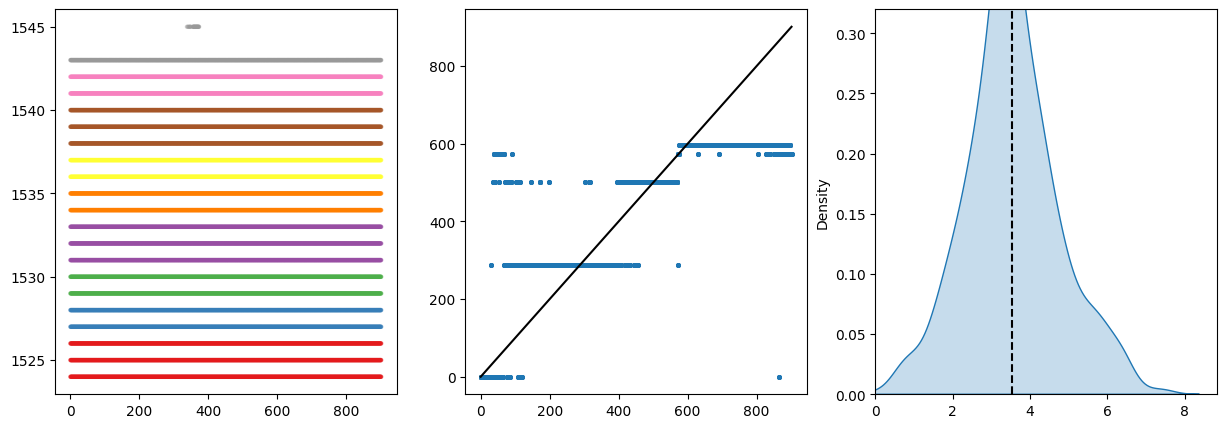

In [5]:
mean_rms_error = sum(rms_errors.values()) / len(rms_errors)


fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,5))

ax1.scatter(df['frame'], df['idx'], c=df['idx'], cmap='Set1', s=5, alpha=0.4)

ax2.scatter(df['frame'], df['best_anchor_frame'], s=5)
ax2.plot(np.linspace(0,df['frame'].max()), np.linspace(0,df['frame'].max()), c='black')

sns.kdeplot(rms_errors, fill=True, ax=ax3)
ax3.vlines(mean_rms_error,0,0.32,color='black',linestyles='dashed')
ax3.set_xlim(0,)
ax3.set_ylim(0,0.32)

plt.show()